USING THE DATA: ASIK RT4 NWIN CLND BLNCD


RT4: 64 scans,

NWIN: WITH NEW INDO SAMPLES SCANS,

CLND: CLEANED FROM OUTLIERS,

BLNCD: THE TOTAL NUMBER ALREADY BALANCED BETWEEN THAI AND NON-THAI

In [1]:
import pandas as pd
import numpy as np

# Retry loading the data_0set
data_0 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4_NWIN_CLND_BLNCD_2.csv")

# Check the columns and first few rows of the data_0
data_0_info = data_0.info()
data_0_head = data_0.head()

# Check for empty cells and NaN values
nan_summary = data_0.isna().sum()

data_0_info, data_0_head, nan_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Columns: 6960 entries, prov_char to predictions
dtypes: float64(6950), int64(2), object(8)
memory usage: 16.1+ MB


(None,
   prov_char country_char               wavenumber   649.893   650.376  \
 0       SUX           ID  ID-SUX-069-2309-002_005  0.019580  0.020577   
 1       SUX           ID  ID-SUX-074-2311-001_005  0.015026  0.014997   
 2       KTX           ID  ID-KTX-068-2306-002_104  0.007675  0.007844   
 3       SGR           MY  MY-SGR-096-2401-002_NCB  0.007805  0.006585   
 4       SSX           ID  ID-SSX-068-2307-028_202  0.011577  0.012206   
 
     650.858    651.34   651.822   652.304   652.786  ...  3999.158   3999.64  \
 0  0.021276  0.021531  0.021289  0.020601  0.019603  ...  0.000612  0.000631   
 1  0.015173  0.015566  0.016130  0.016762  0.017332  ... -0.000344 -0.000257   
 2  0.008136  0.008477  0.008800  0.009070  0.009293  ...  0.002002  0.002076   
 3  0.005669  0.005116  0.004945  0.005136  0.005631  ...  0.001007  0.001068   
 4  0.012885  0.013565  0.014162  0.014576  0.014721  ...  0.000027  0.000041   
 
    4000.122  tgp_name  dgp_name  fgp_name  country_name  t

In [2]:
print(data_0.describe(include='all'))

       prov_char country_char               wavenumber     649.893  \
count        304          304                      304  304.000000   
unique        24            3                      302         NaN   
top          KTX           TH  ID-SSX-068-2307-028_001         NaN   
freq          41          152                        2         NaN   
mean         NaN          NaN                      NaN    0.013914   
std          NaN          NaN                      NaN    0.008246   
min          NaN          NaN                      NaN   -0.076966   
25%          NaN          NaN                      NaN    0.012156   
50%          NaN          NaN                      NaN    0.014559   
75%          NaN          NaN                      NaN    0.017111   
max          NaN          NaN                      NaN    0.025054   

           650.376     650.858      651.34     651.822     652.304  \
count   304.000000  304.000000  304.000000  304.000000  304.000000   
unique         NaN 

In [3]:
data_1 = data_0.copy()

In [4]:
# Delete the specified columns
data_1 = data_0.drop(columns=['thnoth_name_encoded', 'predictions', 'country_char'])

# Rename the column 'wavenumber' to 'sample_code'
data_1 = data_1.rename(columns={'wavenumber': 'sample_code'})

# Display the first few rows of the modified data_1frame
print(data_1.head())

  prov_char              sample_code   649.893   650.376   650.858    651.34  \
0       SUX  ID-SUX-069-2309-002_005  0.019580  0.020577  0.021276  0.021531   
1       SUX  ID-SUX-074-2311-001_005  0.015026  0.014997  0.015173  0.015566   
2       KTX  ID-KTX-068-2306-002_104  0.007675  0.007844  0.008136  0.008477   
3       SGR  MY-SGR-096-2401-002_NCB  0.007805  0.006585  0.005669  0.005116   
4       SSX  ID-SSX-068-2307-028_202  0.011577  0.012206  0.012885  0.013565   

    651.822   652.304   652.786   653.268  ...  3998.194  3998.676  3999.158  \
0  0.021289  0.020601  0.019603  0.018484  ...  0.000519  0.000571  0.000612   
1  0.016130  0.016762  0.017332  0.017710  ... -0.000411 -0.000396 -0.000344   
2  0.008800  0.009070  0.009293  0.009507  ...  0.001873  0.001933  0.002002   
3  0.004945  0.005136  0.005631  0.006331  ...  0.001088  0.001014  0.001007   
4  0.014162  0.014576  0.014721  0.014544  ... -0.000060 -0.000010  0.000027   

    3999.64  4000.122  tgp_name  dgp_n

In [5]:
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [6]:
data_2 = data_1.copy()

DGP

Classification Report for dgp_name:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.80      0.91      0.85       249

    accuracy                           0.75       304
   macro avg       0.40      0.46      0.43       304
weighted avg       0.66      0.75      0.70       304

Confusion Matrix for dgp_name:
[[  0  55]
 [ 22 227]]


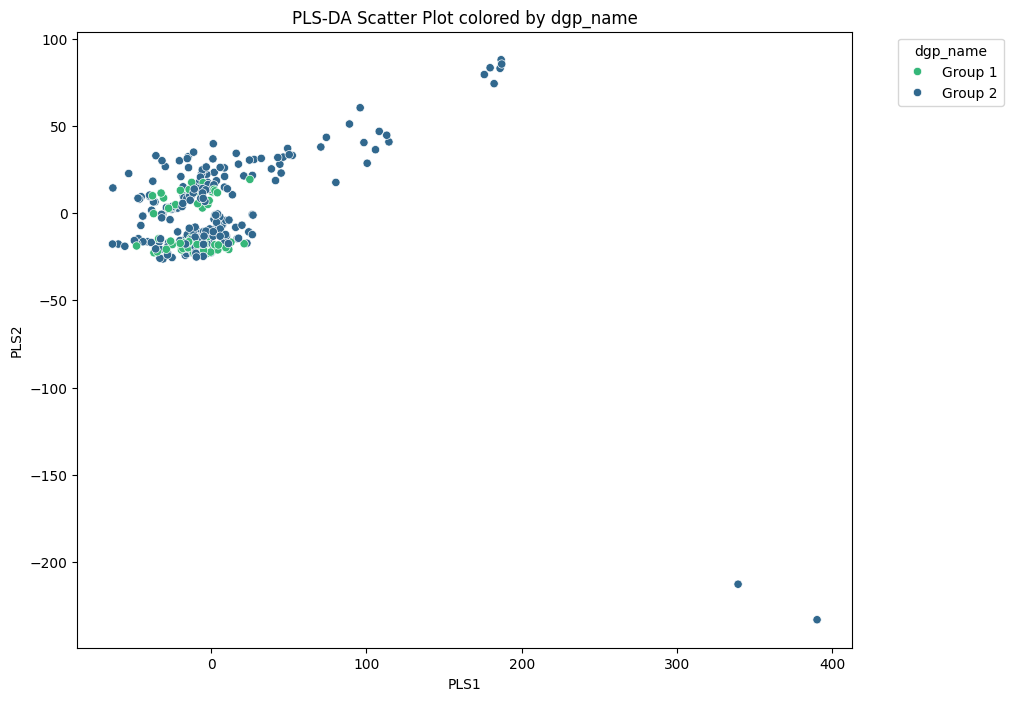

In [7]:
# Separate features and target variables
features_dgp = data_2.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
targets_dgp = data_2['dgp_name']
groups_dgp = data_2['prov_char']

# Encode the target labels
label_encoder_dgp = LabelEncoder()
targets_encoded_dgp = label_encoder_dgp.fit_transform(targets_dgp)

# Standardize the features
scaler_dgp = StandardScaler()
X_scaled_dgp = scaler_dgp.fit_transform(features_dgp)

# Perform PLS-DA and LOGO-CV
pls_dgp = PLSRegression(n_components=2)
classifier_dgp = LogisticRegression()

logo = LeaveOneGroupOut()
y_true_dgp = []
y_pred_dgp = []

for train_idx, test_idx in logo.split(X_scaled_dgp, targets_encoded_dgp, groups_dgp):
    X_train_dgp, X_test_dgp = X_scaled_dgp[train_idx], X_scaled_dgp[test_idx]
    y_train_dgp, y_test_dgp = targets_encoded_dgp[train_idx], targets_encoded_dgp[test_idx]
    
    # Fit PLS-DA
    X_train_pls_dgp = pls_dgp.fit_transform(X_train_dgp, y_train_dgp)[0]
    X_test_pls_dgp = pls_dgp.transform(X_test_dgp)
    
    # Train classifier
    classifier_dgp.fit(X_train_pls_dgp, y_train_dgp)
    
    # Predict
    y_pred_dgp.extend(classifier_dgp.predict(X_test_pls_dgp))
    y_true_dgp.extend(y_test_dgp)

# Evaluate the classifier
print("Classification Report for dgp_name:")
print(classification_report(y_true_dgp, y_pred_dgp))

print("Confusion Matrix for dgp_name:")
print(confusion_matrix(y_true_dgp, y_pred_dgp))

# Fit PLS-DA for visualization purposes
X_pls_dgp = pls_dgp.fit_transform(X_scaled_dgp, targets_encoded_dgp)[0]

# Create a DataFrame for the PLS-DA results
pls_df_dgp = pd.DataFrame(data=X_pls_dgp, columns=['PLS1', 'PLS2'])
pls_df_dgp['dgp_name'] = targets_dgp

# Plotting PLS-DA scatter plot
plt.figure(figsize=(10, 8))
scatter_dgp = sns.scatterplot(data=pls_df_dgp, x='PLS1', y='PLS2', hue='dgp_name', palette='viridis')
plt.title('PLS-DA Scatter Plot colored by dgp_name')
plt.xlabel('PLS1')
plt.ylabel('PLS2')

# Set legend in alphabetical order
handles_dgp, labels_dgp = scatter_dgp.get_legend_handles_labels()
sorted_labels_dgp = sorted(zip(labels_dgp, handles_dgp), key=lambda t: t[0])
labels_dgp, handles_dgp = zip(*sorted_labels_dgp)
plt.legend(handles_dgp, labels_dgp, title='dgp_name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

TGP

Classification Report for tgp_name:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.43      0.63      0.51       142
           2       0.33      0.23      0.27       135

    accuracy                           0.40       304
   macro avg       0.25      0.29      0.26       304
weighted avg       0.35      0.40      0.36       304

Confusion Matrix for tgp_name:
[[  0  17  10]
 [  0  90  52]
 [  0 104  31]]


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicte

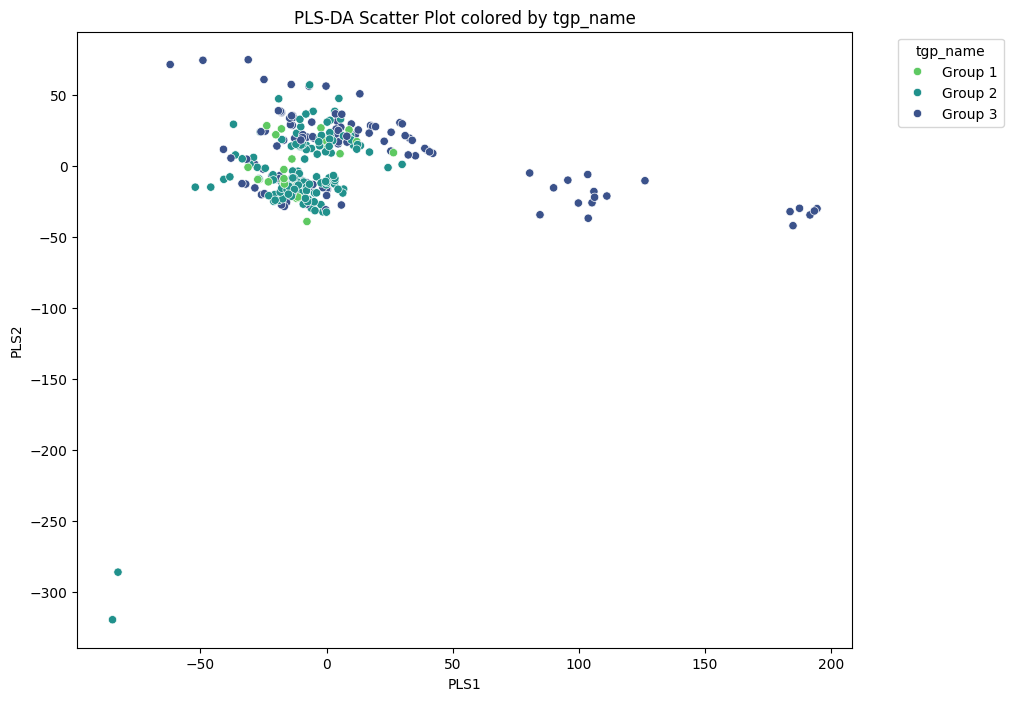

In [9]:
# Separate features and target variables
features_tgp = data_2.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
targets_tgp = data_2['tgp_name']
groups_tgp = data_2['prov_char']

# Encode the target labels
label_encoder_tgp = LabelEncoder()
targets_encoded_tgp = label_encoder_tgp.fit_transform(targets_tgp)

# Standardize the features
scaler_tgp = StandardScaler()
X_scaled_tgp = scaler_tgp.fit_transform(features_tgp)

# Perform PLS-DA and LOGO-CV
pls_tgp = PLSRegression(n_components=2)
classifier_tgp = LogisticRegression()

logo = LeaveOneGroupOut()
y_true_tgp = []
y_pred_tgp = []

for train_idx, test_idx in logo.split(X_scaled_tgp, targets_encoded_tgp, groups_tgp):
    X_train_tgp, X_test_tgp = X_scaled_tgp[train_idx], X_scaled_tgp[test_idx]
    y_train_tgp, y_test_tgp = targets_encoded_tgp[train_idx], targets_encoded_tgp[test_idx]
    
    # Fit PLS-DA
    X_train_pls_tgp = pls_tgp.fit_transform(X_train_tgp, y_train_tgp)[0]
    X_test_pls_tgp = pls_tgp.transform(X_test_tgp)
    
    # Train classifier
    classifier_tgp.fit(X_train_pls_tgp, y_train_tgp)
    
    # Predict
    y_pred_tgp.extend(classifier_tgp.predict(X_test_pls_tgp))
    y_true_tgp.extend(y_test_tgp)

# Evaluate the classifier
print("Classification Report for tgp_name:")
print(classification_report(y_true_tgp, y_pred_tgp))

print("Confusion Matrix for tgp_name:")
print(confusion_matrix(y_true_tgp, y_pred_tgp))

# Fit PLS-DA for visualization purposes
X_pls_tgp = pls_tgp.fit_transform(X_scaled_tgp, targets_encoded_tgp)[0]

# Create a DataFrame for the PLS-DA results
pls_df_tgp = pd.DataFrame(data=X_pls_tgp, columns=['PLS1', 'PLS2'])
pls_df_tgp['tgp_name'] = targets_tgp

# Plotting PLS-DA scatter plot
plt.figure(figsize=(10, 8))
scatter_tgp = sns.scatterplot(data=pls_df_tgp, x='PLS1', y='PLS2', hue='tgp_name', palette='viridis')
plt.title('PLS-DA Scatter Plot colored by tgp_name')
plt.xlabel('PLS1')
plt.ylabel('PLS2')

# Set legend in alphabetical order
handles_tgp, labels_tgp = scatter_tgp.get_legend_handles_labels()
sorted_labels_tgp = sorted(zip(labels_tgp, handles_tgp), key=lambda t: t[0])
labels_tgp, handles_tgp = zip(*sorted_labels_tgp)
plt.legend(handles_tgp, labels_tgp, title='tgp_name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


FGP

Classification Report for fgp_name:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        74
           2       0.34      0.55      0.42       139
           3       0.00      0.00      0.00        69

    accuracy                           0.25       304
   macro avg       0.08      0.14      0.10       304
weighted avg       0.16      0.25      0.19       304

Confusion Matrix for fgp_name:
[[ 0  0 21  1]
 [ 0  0 68  6]
 [18 16 76 29]
 [ 4  6 59  0]]


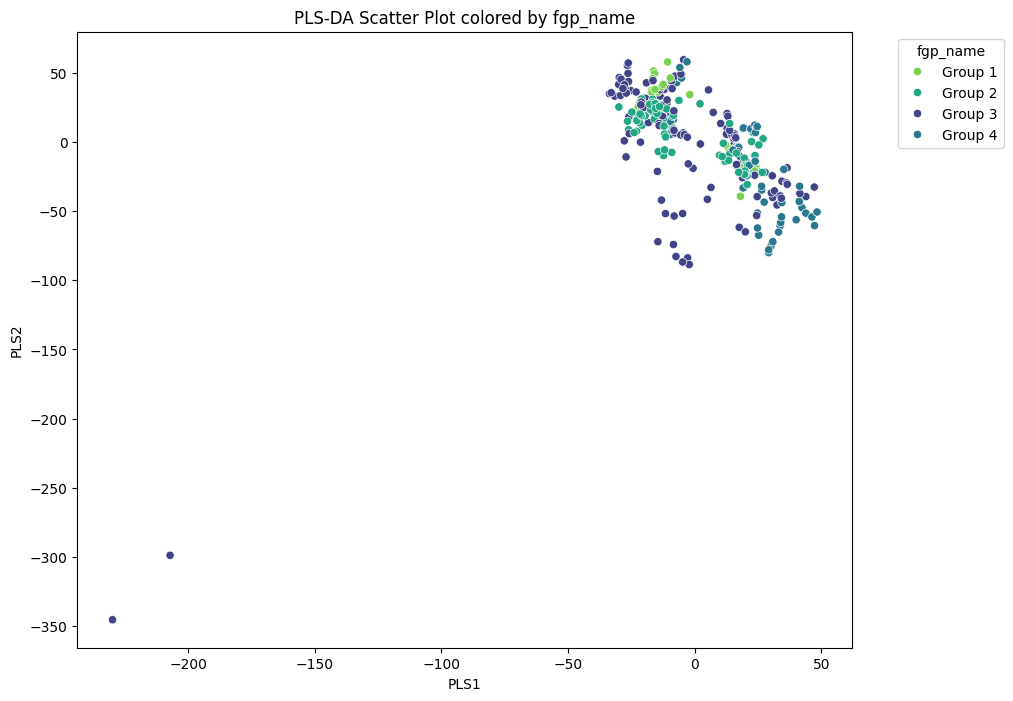

In [12]:
# Separate features and target variables
features_fgp = data_2.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
targets_fgp = data_2['fgp_name']
groups_fgp = data_2['prov_char']

# Encode the target labels
label_encoder_fgp = LabelEncoder()
targets_encoded_fgp = label_encoder_fgp.fit_transform(targets_fgp)

# Standardize the features
scaler_fgp = StandardScaler()
X_scaled_fgp = scaler_fgp.fit_transform(features_fgp)

# Perform PLS-DA and LOGO-CV
pls_fgp = PLSRegression(n_components=2)
classifier_fgp = LogisticRegression()

logo = LeaveOneGroupOut()
y_true_fgp = []
y_pred_fgp = []

for train_idx, test_idx in logo.split(X_scaled_fgp, targets_encoded_fgp, groups_fgp):
    X_train_fgp, X_test_fgp = X_scaled_fgp[train_idx], X_scaled_fgp[test_idx]
    y_train_fgp, y_test_fgp = targets_encoded_fgp[train_idx], targets_encoded_fgp[test_idx]
    
    # Fit PLS-DA
    X_train_pls_fgp = pls_fgp.fit_transform(X_train_fgp, y_train_fgp)[0]
    X_test_pls_fgp = pls_fgp.transform(X_test_fgp)
    
    # Train classifier
    classifier_fgp.fit(X_train_pls_fgp, y_train_fgp)
    
    # Predict
    y_pred_fgp.extend(classifier_fgp.predict(X_test_pls_fgp))
    y_true_fgp.extend(y_test_fgp)

# Evaluate the classifier
print("Classification Report for fgp_name:")
print(classification_report(y_true_fgp, y_pred_fgp))

print("Confusion Matrix for fgp_name:")
print(confusion_matrix(y_true_fgp, y_pred_fgp))

# Fit PLS-DA for visualization purposes
X_pls_fgp = pls_fgp.fit_transform(X_scaled_fgp, targets_encoded_fgp)[0]

# Create a DataFrame for the PLS-DA results
pls_df_fgp = pd.DataFrame(data=X_pls_fgp, columns=['PLS1', 'PLS2'])
pls_df_fgp['fgp_name'] = targets_fgp

# Plotting PLS-DA scatter plot
plt.figure(figsize=(10, 8))
scatter_fgp = sns.scatterplot(data=pls_df_fgp, x='PLS1', y='PLS2', hue='fgp_name', palette='viridis')
plt.title('PLS-DA Scatter Plot colored by fgp_name')
plt.xlabel('PLS1')
plt.ylabel('PLS2')

# Set legend in alphabetical order
handles_fgp, labels_fgp = scatter_fgp.get_legend_handles_labels()
sorted_labels_fgp = sorted(zip(labels_fgp, handles_fgp), key=lambda t: t[0])
labels_fgp, handles_fgp = zip(*sorted_labels_fgp)
plt.legend(handles_fgp, labels_fgp, title='fgp_name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


country_name

Classification Report for country_name:
              precision    recall  f1-score   support

           0       0.38      0.25      0.30       139
           1       0.00      0.00      0.00        13
           2       0.50      0.70      0.58       152

    accuracy                           0.46       304
   macro avg       0.29      0.32      0.30       304
weighted avg       0.42      0.46      0.43       304

Confusion Matrix for country_name:
[[ 35   0 104]
 [ 10   0   3]
 [ 46   0 106]]


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicte

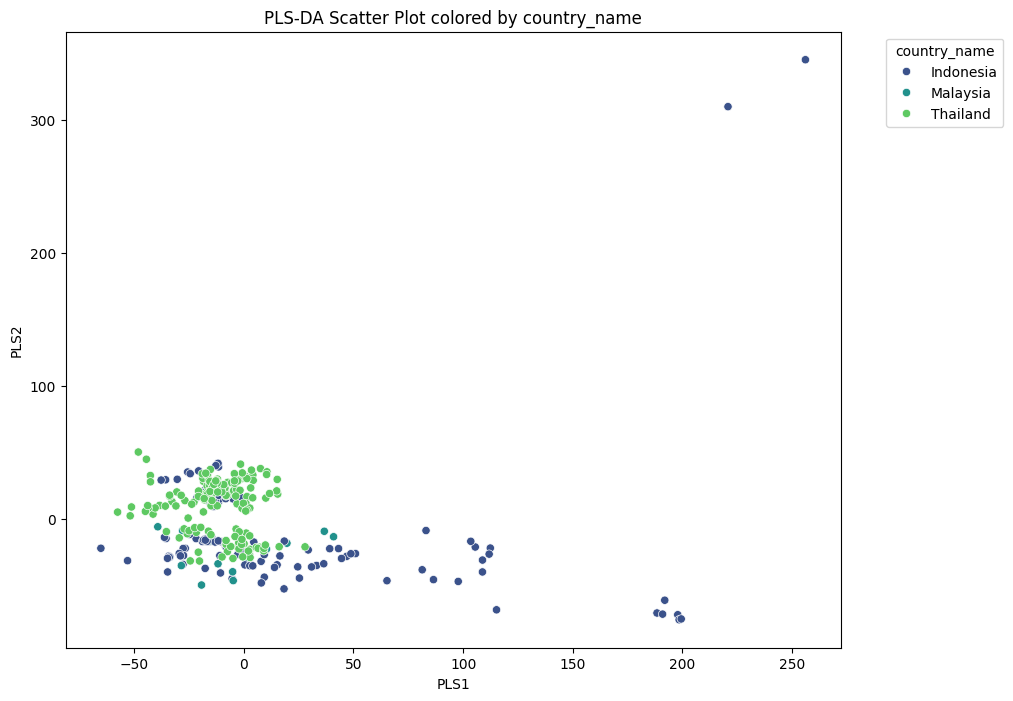

In [14]:
# Separate features and target variables
features_cnt = data_2.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
targets_cnt = data_2['country_name']
groups_cnt = data_2['prov_char']

# Encode the target labels
label_encoder_cnt = LabelEncoder()
targets_encoded_cnt = label_encoder_cnt.fit_transform(targets_cnt)

# Standardize the features
scaler_cnt = StandardScaler()
X_scaled_cnt = scaler_cnt.fit_transform(features_cnt)

# Perform PLS-DA and LOGO-CV
pls_cnt = PLSRegression(n_components=2)
classifier_cnt = LogisticRegression()

logo = LeaveOneGroupOut()
y_true_cnt = []
y_pred_cnt = []

for train_idx, test_idx in logo.split(X_scaled_cnt, targets_encoded_cnt, groups_cnt):
    X_train_cnt, X_test_cnt = X_scaled_cnt[train_idx], X_scaled_cnt[test_idx]
    y_train_cnt, y_test_cnt = targets_encoded_cnt[train_idx], targets_encoded_cnt[test_idx]
    
    # Fit PLS-DA
    X_train_pls_cnt = pls_cnt.fit_transform(X_train_cnt, y_train_cnt)[0]
    X_test_pls_cnt = pls_cnt.transform(X_test_cnt)
    
    # Train classifier
    classifier_cnt.fit(X_train_pls_cnt, y_train_cnt)
    
    # Predict
    y_pred_cnt.extend(classifier_cnt.predict(X_test_pls_cnt))
    y_true_cnt.extend(y_test_cnt)

# Evaluate the classifier
print("Classification Report for country_name:")
print(classification_report(y_true_cnt, y_pred_cnt))

print("Confusion Matrix for country_name:")
print(confusion_matrix(y_true_cnt, y_pred_cnt))

# Fit PLS-DA for visualization purposes
X_pls_cnt = pls_cnt.fit_transform(X_scaled_cnt, targets_encoded_cnt)[0]

# Create a DataFrame for the PLS-DA results
pls_df_cnt = pd.DataFrame(data=X_pls_cnt, columns=['PLS1', 'PLS2'])
pls_df_cnt['country_name'] = targets_cnt

# Plotting PLS-DA scatter plot
plt.figure(figsize=(10, 8))
scatter_cnt = sns.scatterplot(data=pls_df_cnt, x='PLS1', y='PLS2', hue='country_name', palette='viridis')
plt.title('PLS-DA Scatter Plot colored by country_name')
plt.xlabel('PLS1')
plt.ylabel('PLS2')

# Set legend in alphabetical order
handles_cnt, labels_cnt = scatter_cnt.get_legend_handles_labels()
sorted_labels_cnt = sorted(zip(labels_cnt, handles_cnt), key=lambda t: t[0])
labels_cnt, handles_cnt = zip(*sorted_labels_cnt)
plt.legend(handles_cnt, labels_cnt, title='country_name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Thai/Non-Thai

Classification Report for thnoth_name:
              precision    recall  f1-score   support

           0       0.54      0.38      0.44       152
           1       0.52      0.68      0.59       152

    accuracy                           0.53       304
   macro avg       0.53      0.53      0.52       304
weighted avg       0.53      0.53      0.52       304

Confusion Matrix for thnoth_name:
[[ 57  95]
 [ 49 103]]


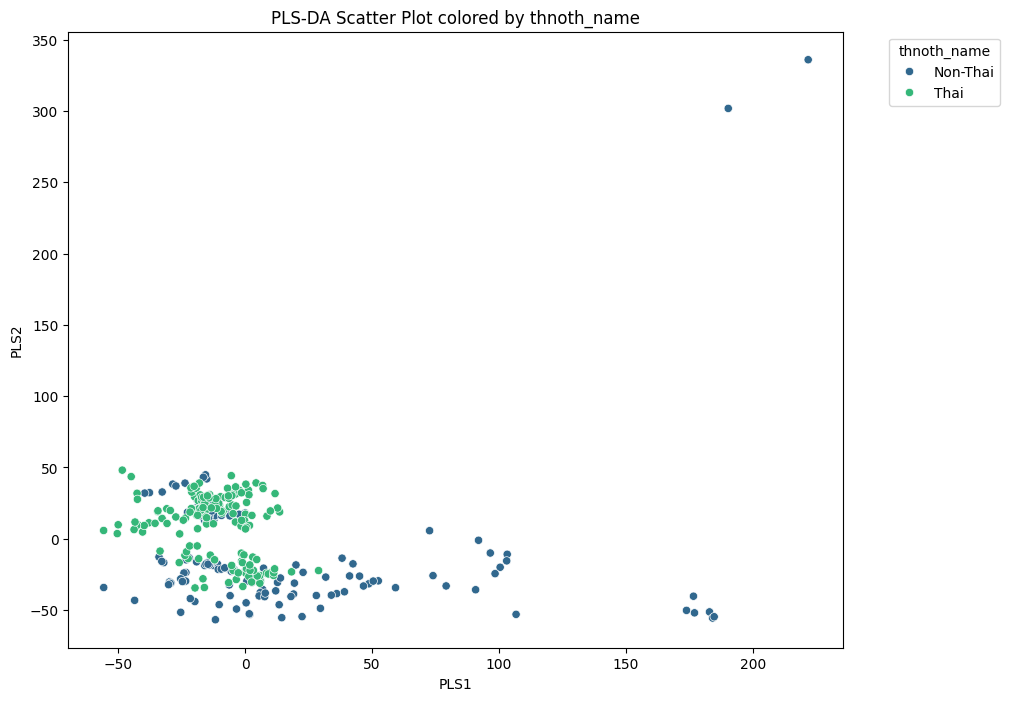

In [17]:
# Separate features and target variables
features_tnt = data_2.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
targets_tnt = data_2['thnoth_name']
groups_tnt = data_2['prov_char']

# Encode the target labels
label_encoder_tnt = LabelEncoder()
targets_encoded_tnt = label_encoder_tnt.fit_transform(targets_tnt)

# Standardize the features
scaler_tnt = StandardScaler()
X_scaled_tnt = scaler_tnt.fit_transform(features_tnt)

# Perform PLS-DA and LOGO-CV
pls_tnt = PLSRegression(n_components=2)
classifier_tnt = LogisticRegression()

logo = LeaveOneGroupOut()
y_true_tnt = []
y_pred_tnt = []

for train_idx, test_idx in logo.split(X_scaled_tnt, targets_encoded_tnt, groups_tnt):
    X_train_tnt, X_test_tnt = X_scaled_tnt[train_idx], X_scaled_tnt[test_idx]
    y_train_tnt, y_test_tnt = targets_encoded_tnt[train_idx], targets_encoded_tnt[test_idx]
    
    # Fit PLS-DA
    X_train_pls_tnt = pls_tnt.fit_transform(X_train_tnt, y_train_tnt)[0]
    X_test_pls_tnt = pls_tnt.transform(X_test_tnt)
    
    # Train classifier
    classifier_tnt.fit(X_train_pls_tnt, y_train_tnt)
    
    # Predict
    y_pred_tnt.extend(classifier_tnt.predict(X_test_pls_tnt))
    y_true_tnt.extend(y_test_tnt)

# Evaluate the classifier
print("Classification Report for thnoth_name:")
print(classification_report(y_true_tnt, y_pred_tnt))

print("Confusion Matrix for thnoth_name:")
print(confusion_matrix(y_true_tnt, y_pred_tnt))

# Fit PLS-DA for visualization purposes
X_pls_tnt = pls_tnt.fit_transform(X_scaled_tnt, targets_encoded_tnt)[0]

# Create a DataFrame for the PLS-DA results
pls_df_tnt = pd.DataFrame(data=X_pls_tnt, columns=['PLS1', 'PLS2'])
pls_df_tnt['thnoth_name'] = targets_tnt

# Plotting PLS-DA scatter plot
plt.figure(figsize=(10, 8))
scatter_tnt = sns.scatterplot(data=pls_df_tnt, x='PLS1', y='PLS2', hue='thnoth_name', palette='viridis')
plt.title('PLS-DA Scatter Plot colored by thnoth_name')
plt.xlabel('PLS1')
plt.ylabel('PLS2')

# Set legend in alphabetical order
handles_tnt, labels_tnt = scatter_tnt.get_legend_handles_labels()
sorted_labels_tnt = sorted(zip(labels_tnt, handles_tnt), key=lambda t: t[0])
labels_tnt, handles_tnt = zip(*sorted_labels_tnt)
plt.legend(handles_tnt, labels_tnt, title='thnoth_name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


plot

Classification Report for dgp_name:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.80      0.91      0.85       249

    accuracy                           0.75       304
   macro avg       0.40      0.46      0.43       304
weighted avg       0.66      0.75      0.70       304

Confusion Matrix for dgp_name:
[[  0  55]
 [ 22 227]]


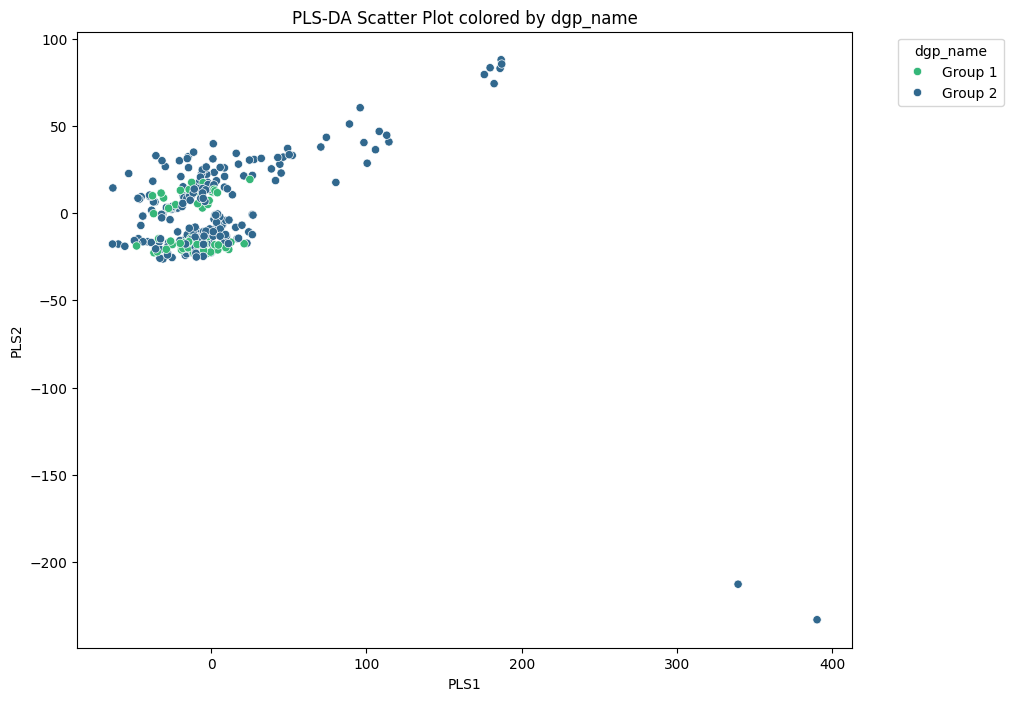

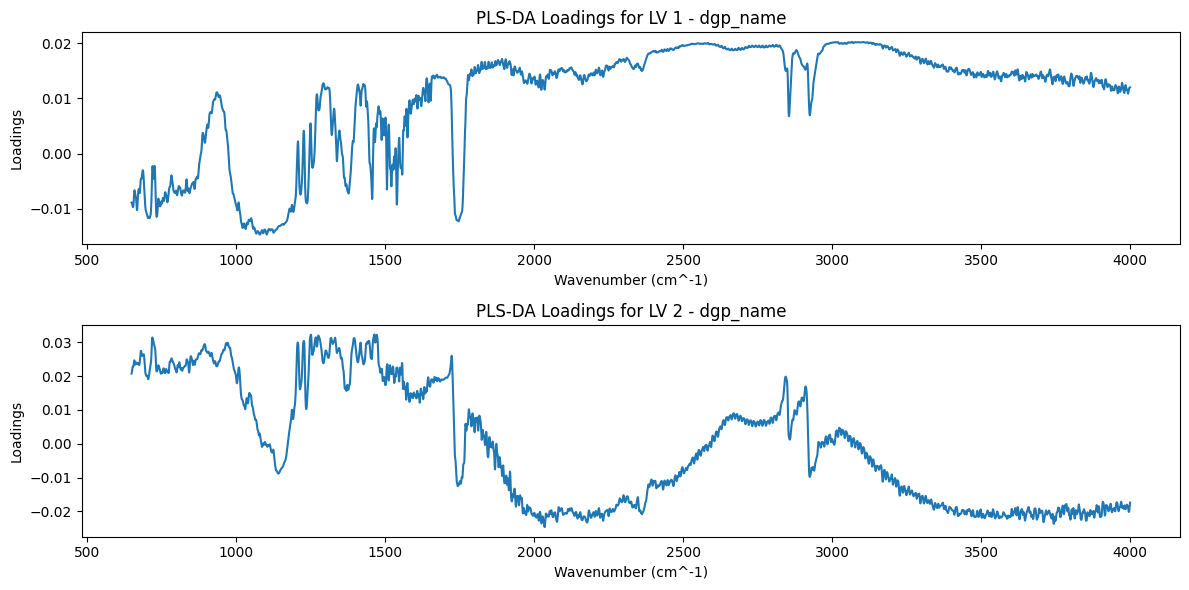

Classification Report for tgp_name:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.43      0.63      0.51       142
           2       0.33      0.23      0.27       135

    accuracy                           0.40       304
   macro avg       0.25      0.29      0.26       304
weighted avg       0.35      0.40      0.36       304

Confusion Matrix for tgp_name:
[[  0  17  10]
 [  0  90  52]
 [  0 104  31]]


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicte

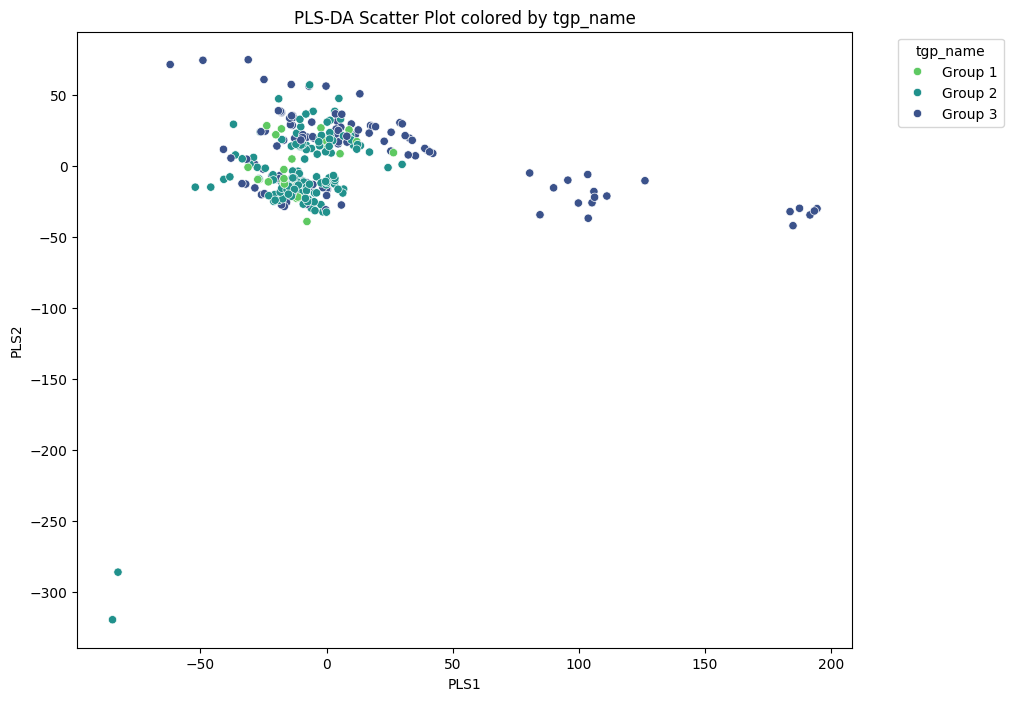

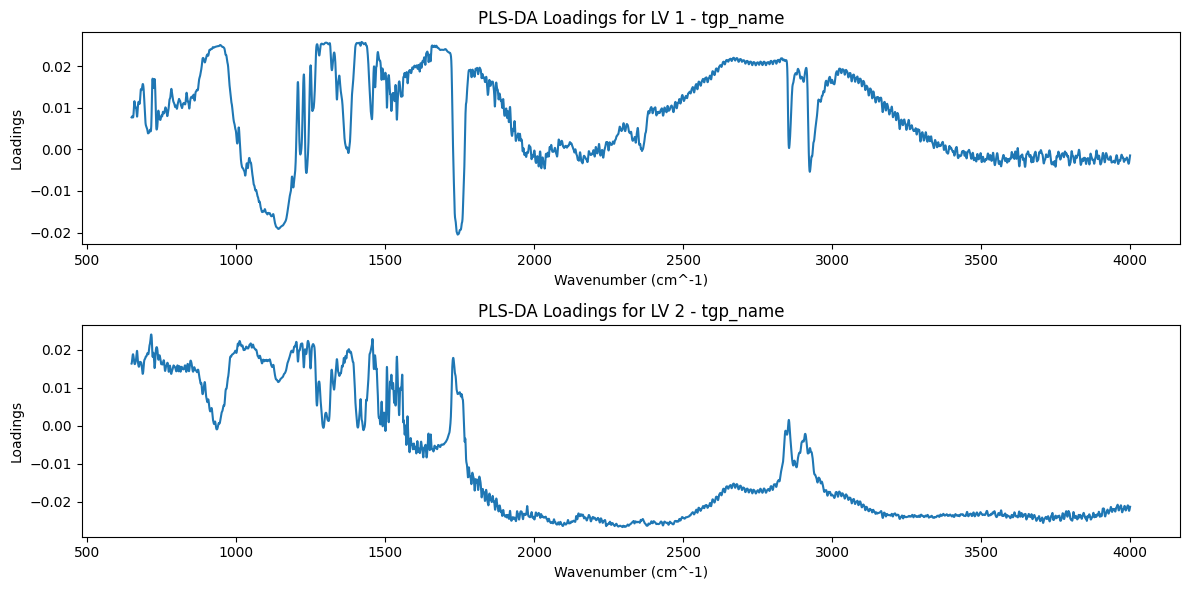

Classification Report for fgp_name:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        74
           2       0.34      0.55      0.42       139
           3       0.00      0.00      0.00        69

    accuracy                           0.25       304
   macro avg       0.08      0.14      0.10       304
weighted avg       0.16      0.25      0.19       304

Confusion Matrix for fgp_name:
[[ 0  0 21  1]
 [ 0  0 68  6]
 [18 16 76 29]
 [ 4  6 59  0]]


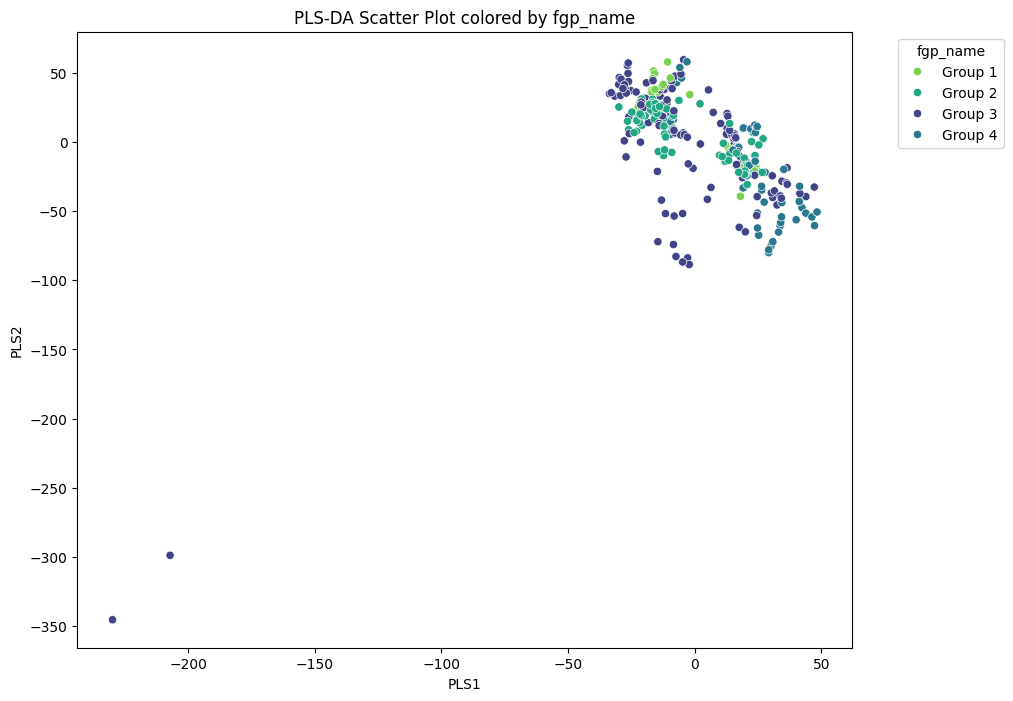

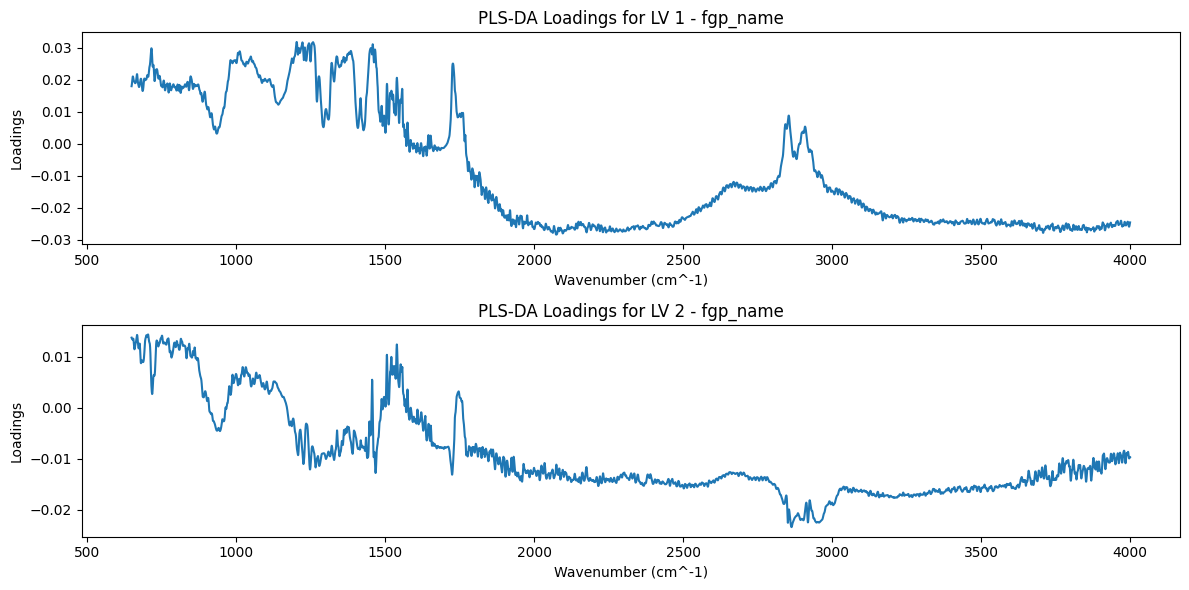

Classification Report for country_name:
              precision    recall  f1-score   support

           0       0.38      0.25      0.30       139
           1       0.00      0.00      0.00        13
           2       0.50      0.70      0.58       152

    accuracy                           0.46       304
   macro avg       0.29      0.32      0.30       304
weighted avg       0.42      0.46      0.43       304

Confusion Matrix for country_name:
[[ 35   0 104]
 [ 10   0   3]
 [ 46   0 106]]


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicte

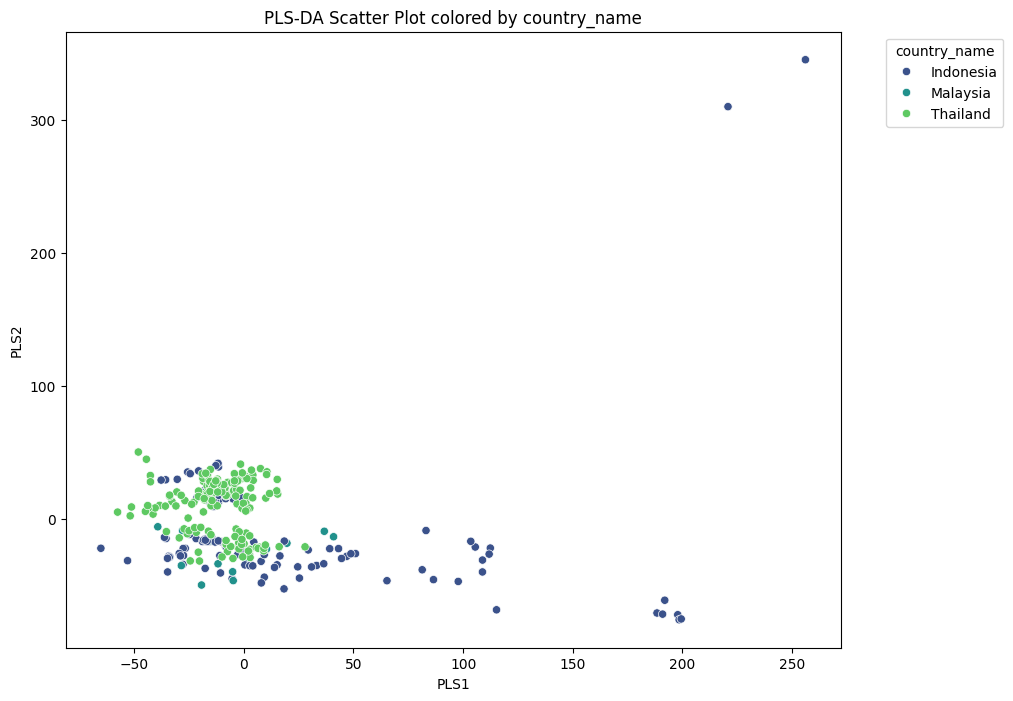

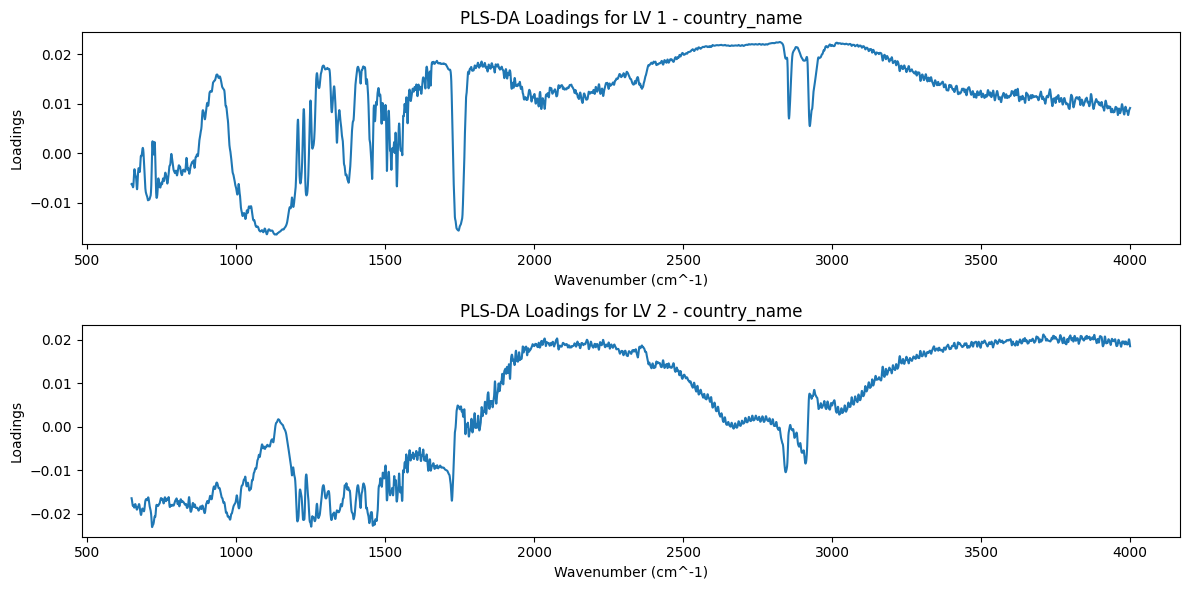

Classification Report for thnoth_name:
              precision    recall  f1-score   support

           0       0.54      0.38      0.44       152
           1       0.52      0.68      0.59       152

    accuracy                           0.53       304
   macro avg       0.53      0.53      0.52       304
weighted avg       0.53      0.53      0.52       304

Confusion Matrix for thnoth_name:
[[ 57  95]
 [ 49 103]]


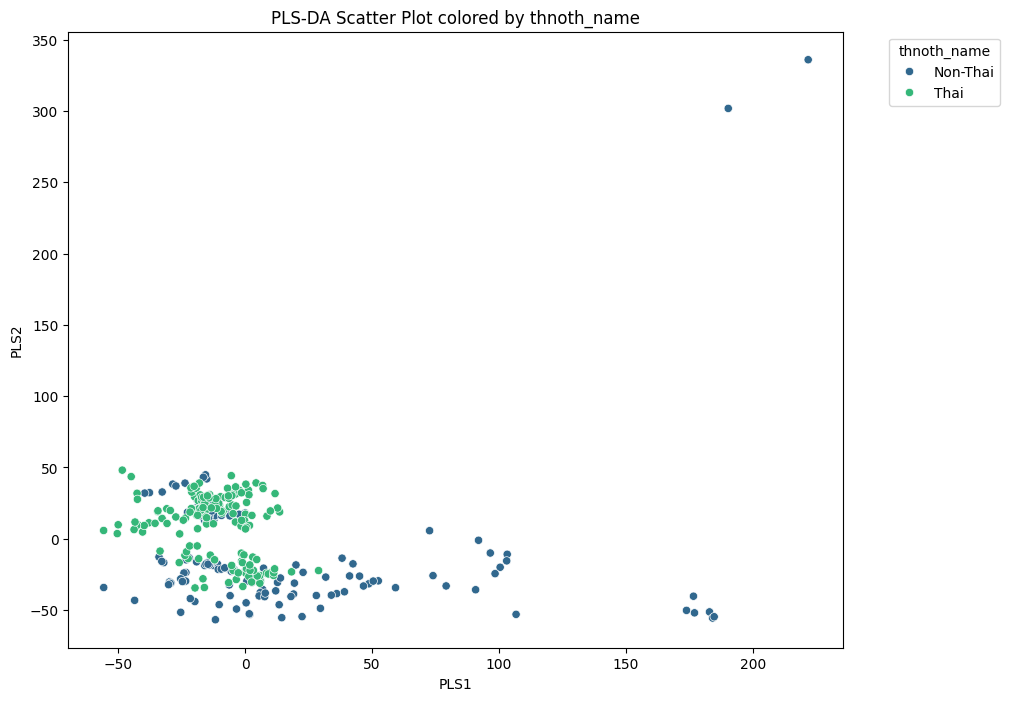

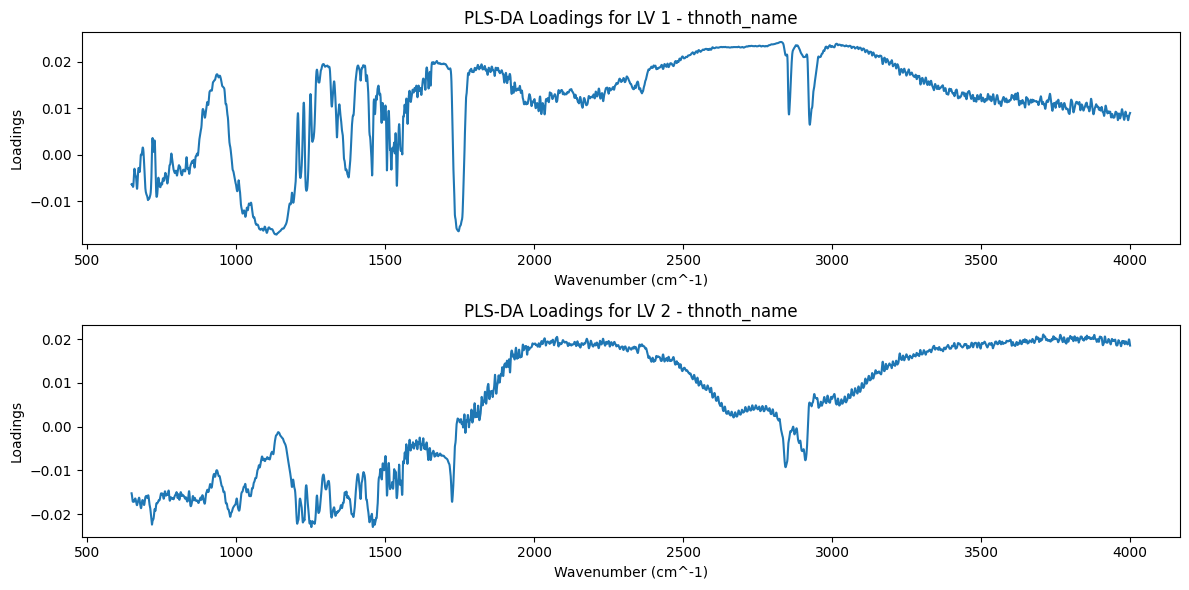

In [ ]:
# Define a function to perform PLS-DA and visualize the results
def perform_pls_da(target_column_name, target_label):
    features_pls = data.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
    targets_pls = data[target_column_name]
    groups_pls = data['prov_char']
    
    # Encode the target labels
    label_encoder_pls = LabelEncoder()
    targets_encoded_pls = label_encoder_pls.fit_transform(targets_pls)
    
    # Standardize the features
    scaler_pls = StandardScaler()
    X_scaled_pls = scaler_pls.fit_transform(features_pls)
    
    # Perform PLS-DA and LOGO-CV
    pls = PLSRegression(n_components=2)
    classifier_pls = LogisticRegression()
    
    logo_pls = LeaveOneGroupOut()
    y_true_pls = []
    y_pred_pls = []
    
    for train_idx_pls, test_idx_pls in logo_pls.split(X_scaled_pls, targets_encoded_pls, groups_pls):
        X_train_pls, X_test_pls = X_scaled_pls[train_idx_pls], X_scaled_pls[test_idx_pls]
        y_train_pls, y_test_pls = targets_encoded_pls[train_idx_pls], targets_encoded_pls[test_idx_pls]
        
        # Fit PLS-DA
        X_train_pls_transformed = pls.fit_transform(X_train_pls, y_train_pls)[0]
        X_test_pls_transformed = pls.transform(X_test_pls)
        
        # Train classifier
        classifier_pls.fit(X_train_pls_transformed, y_train_pls)
        
        # Predict
        y_pred_pls.extend(classifier_pls.predict(X_test_pls_transformed))
        y_true_pls.extend(y_test_pls)
    
    # Evaluate the classifier
    print(f"Classification Report for {target_label}:")
    print(classification_report(y_true_pls, y_pred_pls))
    
    print(f"Confusion Matrix for {target_label}:")
    print(confusion_matrix(y_true_pls, y_pred_pls))
    
    # Fit PLS-DA for visualization purposes
    X_pls_final = pls.fit_transform(X_scaled_pls, targets_encoded_pls)[0]
    
    # Create a DataFrame for the PLS-DA results
    pls_df = pd.DataFrame(data=X_pls_final, columns=['PLS1', 'PLS2'])
    pls_df[target_label] = targets_pls
    
    # Plotting PLS-DA scatter plot
    plt.figure(figsize=(5, 4))
    scatter_pls = sns.scatterplot(data=pls_df, x='PLS1', y='PLS2', hue=target_label, palette='viridis')
    plt.title(f'PLS-DA Scatter Plot colored by {target_label}')
    plt.xlabel('PLS1')
    plt.ylabel('PLS2')
    
    # Set legend in alphabetical order
    handles_pls, labels_pls = scatter_pls.get_legend_handles_labels()
    sorted_labels_pls = sorted(zip(labels_pls, handles_pls), key=lambda t: t[0])
    labels_pls, handles_pls = zip(*sorted_labels_pls)
    plt.legend(handles_pls, labels_pls, title=target_label, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()
    
    # Plotting the loadings
    loadings_pls = pls.x_loadings_
    wavenumbers_pls = np.arange(650, 4000, (4000-650)/loadings_pls.shape[0])
    
    plt.figure(figsize=(6, 3))
    
    # Plot loadings for first component
    plt.subplot(2, 1, 1)
    plt.plot(wavenumbers_pls, loadings_pls[:, 0])
    plt.title(f'PLS-DA Loadings for LV 1 - {target_label}')
    plt.xlabel('Wavenumber (cm^-1)')
    plt.ylabel('Loadings')
    
    # Plot loadings for second component
    plt.subplot(2, 1, 2)
    plt.plot(wavenumbers_pls, loadings_pls[:, 1])
    plt.title(f'PLS-DA Loadings for LV 2 - {target_label}')
    plt.xlabel('Wavenumber (cm^-1)')
    plt.ylabel('Loadings')
    
    plt.tight_layout()
    plt.show()

# Perform PLS-DA for different target variables
perform_pls_da('dgp_name', 'dgp_name')
perform_pls_da('tgp_name', 'tgp_name')
perform_pls_da('fgp_name', 'fgp_name')
perform_pls_da('country_name', 'country_name')
perform_pls_da('thnoth_name', 'thnoth_name')

LDA


In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Classification Report for tgp_name:
              precision    recall  f1-score   support

           0       0.10      0.07      0.08        27
           1       0.45      0.62      0.52       142
           2       0.35      0.23      0.28       135

    accuracy                           0.40       304
   macro avg       0.30      0.31      0.29       304
weighted avg       0.38      0.40      0.37       304

Confusion Matrix for tgp_name:
[[ 2 17  8]
 [ 5 88 49]
 [14 90 31]]


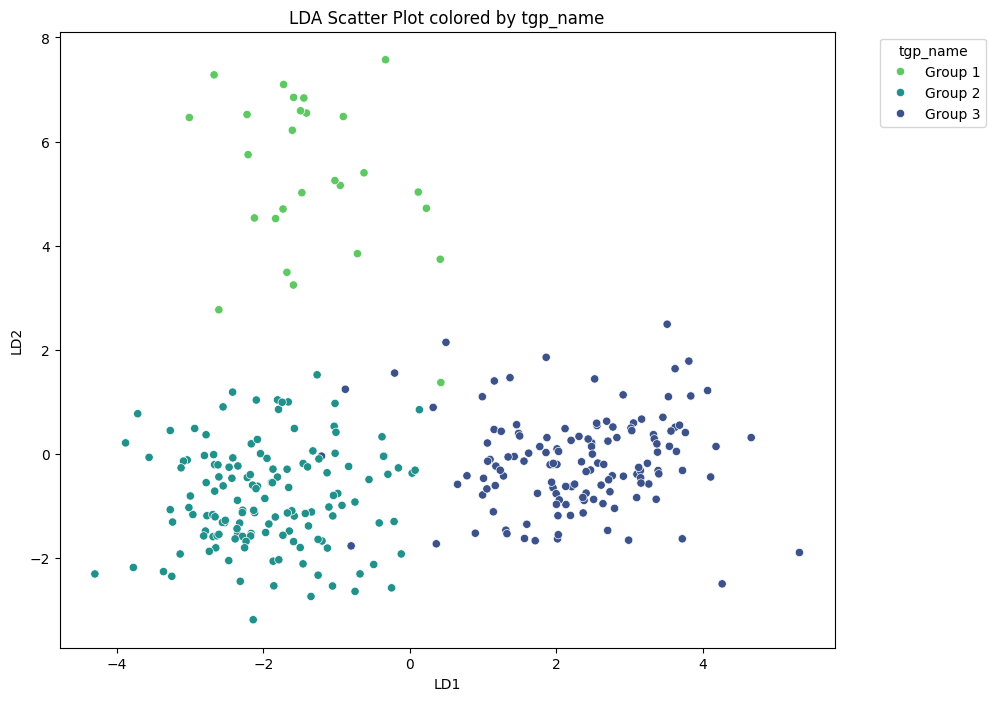

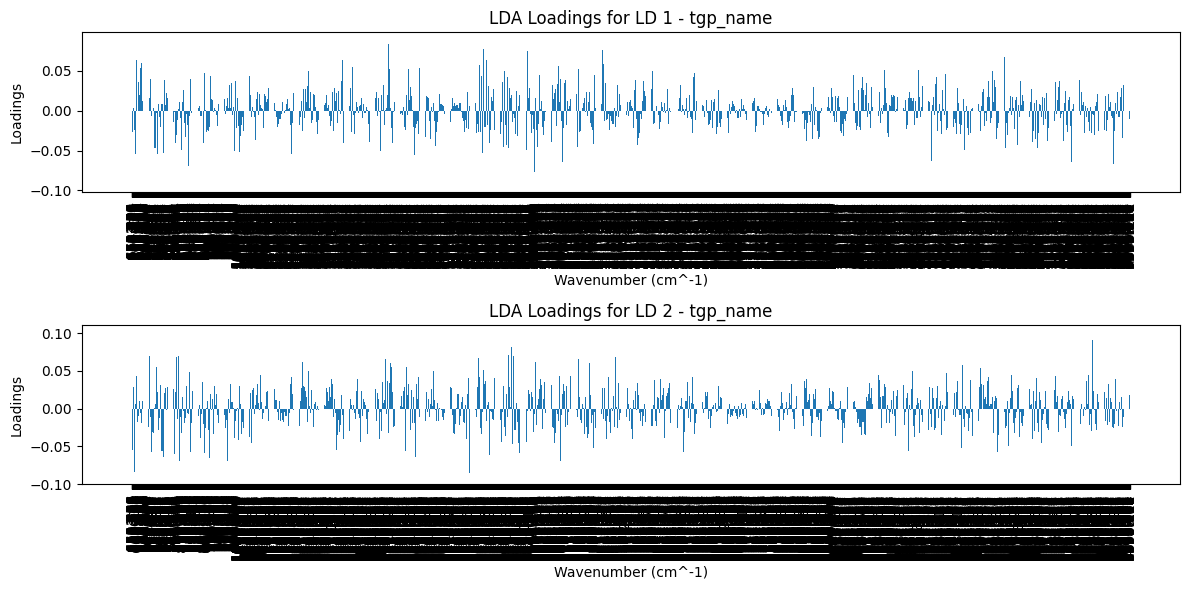

Classification Report for fgp_name:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.23      0.39      0.29        74
           2       0.25      0.23      0.24       139
           3       0.06      0.03      0.04        69

    accuracy                           0.21       304
   macro avg       0.13      0.16      0.14       304
weighted avg       0.18      0.21      0.19       304

Confusion Matrix for fgp_name:
[[ 0  6 15  1]
 [ 3 29 41  1]
 [11 67 32 29]
 [ 2 26 39  2]]


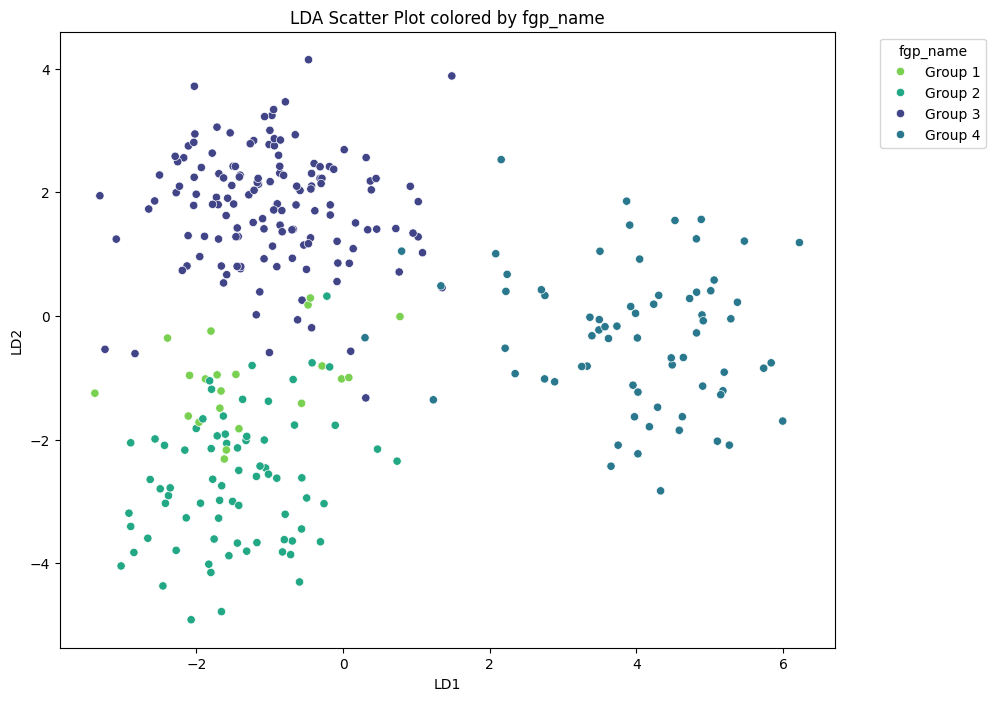

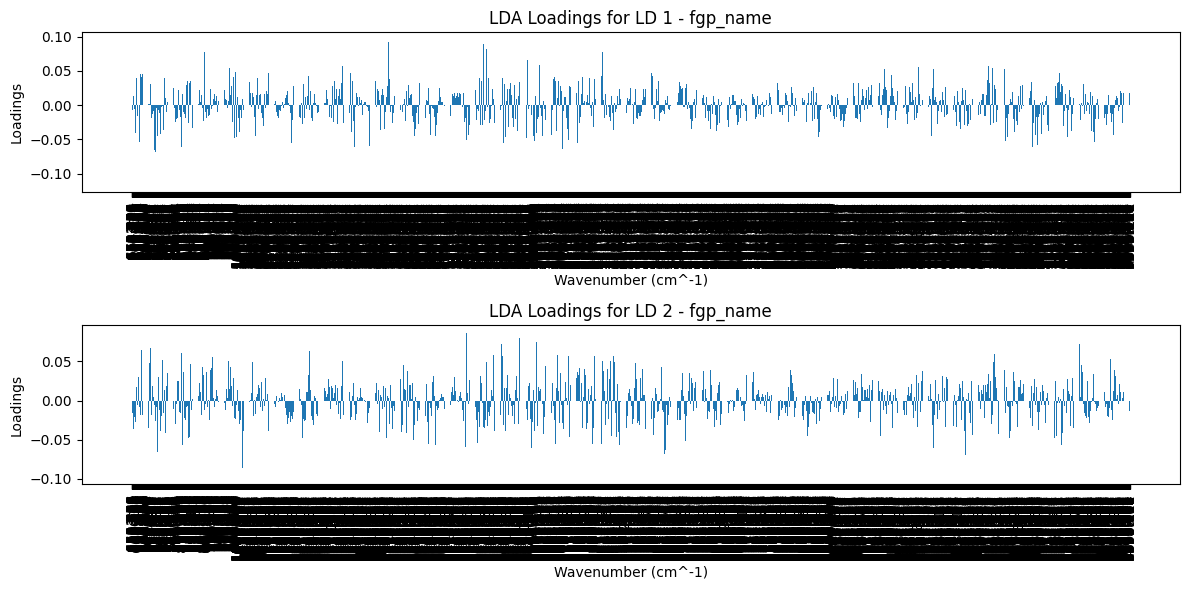

Classification Report for country_name:
              precision    recall  f1-score   support

           0       0.41      0.22      0.28       139
           1       0.00      0.00      0.00        13
           2       0.54      0.76      0.63       152

    accuracy                           0.48       304
   macro avg       0.32      0.33      0.30       304
weighted avg       0.46      0.48      0.44       304

Confusion Matrix for country_name:
[[ 30  13  96]
 [  9   0   4]
 [ 34   2 116]]


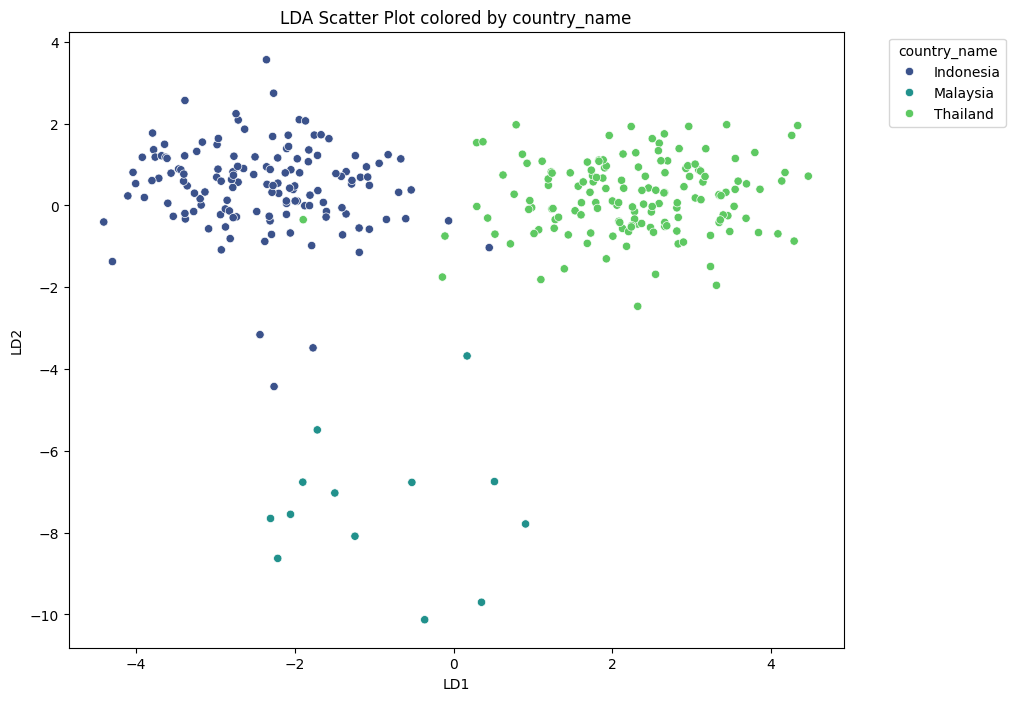

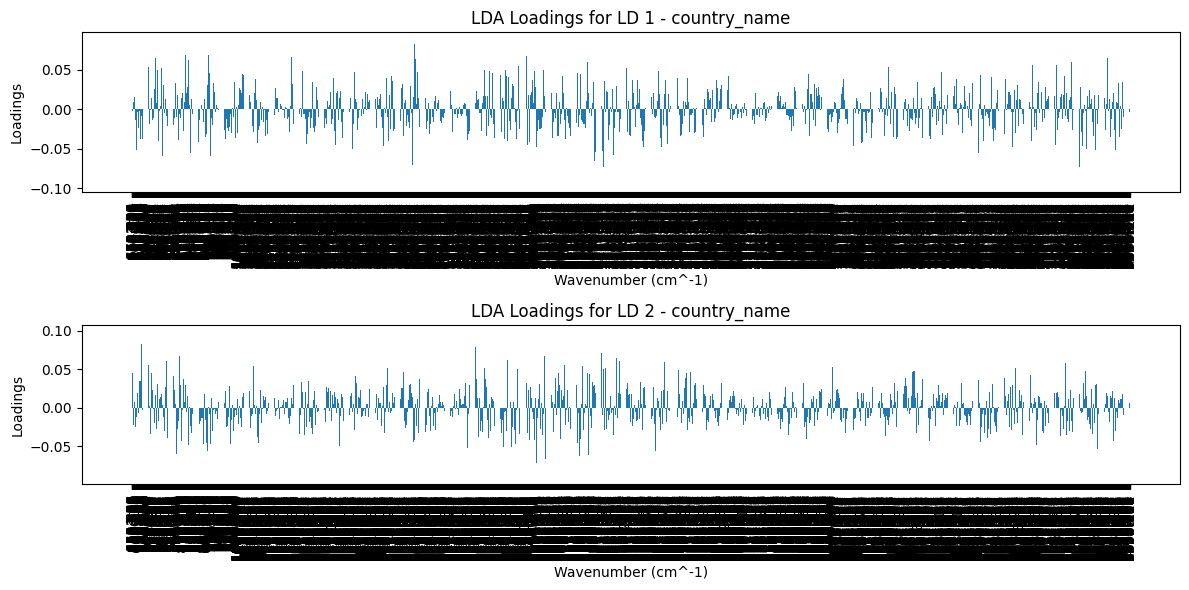

In [23]:

# Define a function to perform LDA and visualize the results
def perform_lda(target_column_name, target_label):
    features_lda = data_2.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
    targets_lda = data_2[target_column_name]
    groups_lda = data_2['prov_char']
    
    # Encode the target labels
    label_encoder_lda = LabelEncoder()
    targets_encoded_lda = label_encoder_lda.fit_transform(targets_lda)
    
    # Standardize the features
    scaler_lda = StandardScaler()
    X_scaled_lda = scaler_lda.fit_transform(features_lda)
    
    # Perform LDA and LOGO-CV
    lda = LinearDiscriminantAnalysis(n_components=2)
    classifier_lda = LogisticRegression()
    
    logo_lda = LeaveOneGroupOut()
    y_true_lda = []
    y_pred_lda = []
    
    for train_idx_lda, test_idx_lda in logo_lda.split(X_scaled_lda, targets_encoded_lda, groups_lda):
        X_train_lda, X_test_lda = X_scaled_lda[train_idx_lda], X_scaled_lda[test_idx_lda]
        y_train_lda, y_test_lda = targets_encoded_lda[train_idx_lda], targets_encoded_lda[test_idx_lda]
        
        # Fit LDA
        X_train_lda_transformed = lda.fit_transform(X_train_lda, y_train_lda)
        X_test_lda_transformed = lda.transform(X_test_lda)
        
        # Train classifier
        classifier_lda.fit(X_train_lda_transformed, y_train_lda)
        
        # Predict
        y_pred_lda.extend(classifier_lda.predict(X_test_lda_transformed))
        y_true_lda.extend(y_test_lda)
    
    # Evaluate the classifier
    print(f"Classification Report for {target_label}:")
    print(classification_report(y_true_lda, y_pred_lda))
    
    print(f"Confusion Matrix for {target_label}:")
    print(confusion_matrix(y_true_lda, y_pred_lda))
    
    # Fit LDA for visualization purposes
    X_lda_final = lda.fit_transform(X_scaled_lda, targets_encoded_lda)
    
    # Create a DataFrame for the LDA results
    lda_df = pd.DataFrame(data=X_lda_final, columns=['LD1', 'LD2'])
    lda_df[target_label] = targets_lda
    
    # Plotting LDA scatter plot
    plt.figure(figsize=(10, 8))
    scatter_lda = sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue=target_label, palette='viridis')
    plt.title(f'LDA Scatter Plot colored by {target_label}')
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    
    # Set legend in alphabetical order
    handles_lda, labels_lda = scatter_lda.get_legend_handles_labels()
    sorted_labels_lda = sorted(zip(labels_lda, handles_lda), key=lambda t: t[0])
    labels_lda, handles_lda = zip(*sorted_labels_lda)
    plt.legend(handles_lda, labels_lda, title=target_label, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()
    
    # Plotting the loadings
    loadings_lda = lda.scalings_
    wavenumbers = features_lda.columns  # Assuming feature columns are named by wavenumber
    
    plt.figure(figsize=(12, 6))
    
    # Plot loadings for first component
    plt.subplot(2, 1, 1)
    plt.bar(wavenumbers, loadings_lda[:, 0])
    plt.title(f'LDA Loadings for LD 1 - {target_label}')
    plt.xlabel('Wavenumber (cm^-1)')
    plt.ylabel('Loadings')
    plt.xticks(rotation=90)
    
    # Plot loadings for second component
    plt.subplot(2, 1, 2)
    plt.bar(wavenumbers, loadings_lda[:, 1])
    plt.title(f'LDA Loadings for LD 2 - {target_label}')
    plt.xlabel('Wavenumber (cm^-1)')
    plt.ylabel('Loadings')
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

# Perform LDA for different target variables
perform_lda('tgp_name', 'tgp_name')
perform_lda('fgp_name', 'fgp_name')
perform_lda('country_name', 'country_name')

Classification Report for tgp_name:
              precision    recall  f1-score   support

           0       0.10      0.07      0.08        27
           1       0.45      0.62      0.52       142
           2       0.35      0.23      0.28       135

    accuracy                           0.40       304
   macro avg       0.30      0.31      0.29       304
weighted avg       0.38      0.40      0.37       304

Confusion Matrix for tgp_name:
[[ 2 17  8]
 [ 5 88 49]
 [14 90 31]]


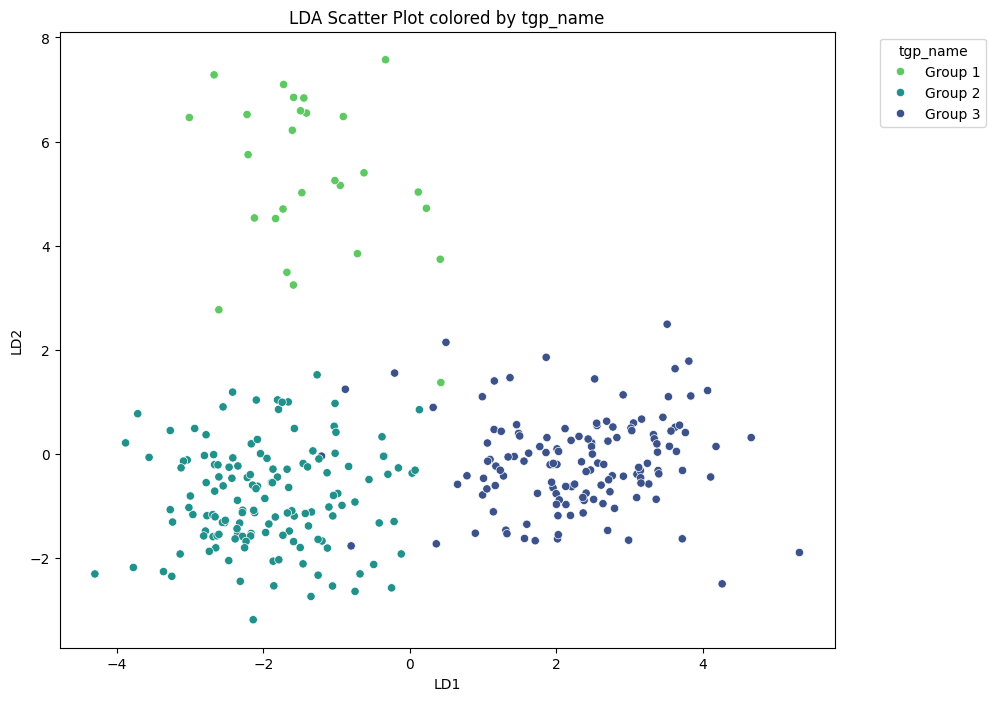

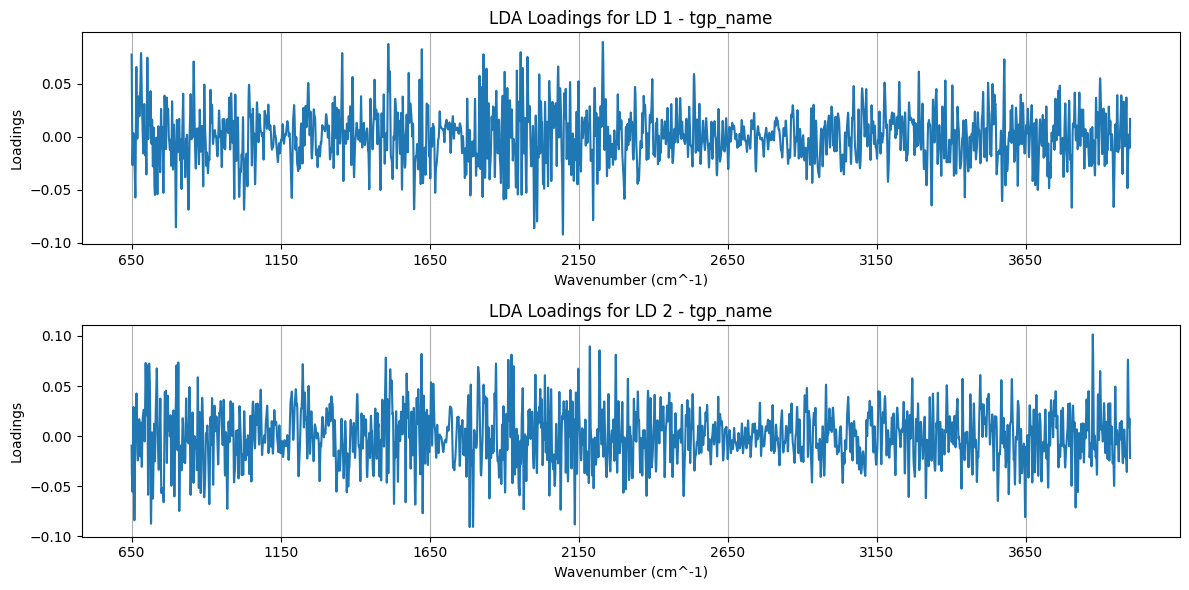

Classification Report for fgp_name:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.23      0.39      0.29        74
           2       0.25      0.23      0.24       139
           3       0.06      0.03      0.04        69

    accuracy                           0.21       304
   macro avg       0.13      0.16      0.14       304
weighted avg       0.18      0.21      0.19       304

Confusion Matrix for fgp_name:
[[ 0  6 15  1]
 [ 3 29 41  1]
 [11 67 32 29]
 [ 2 26 39  2]]


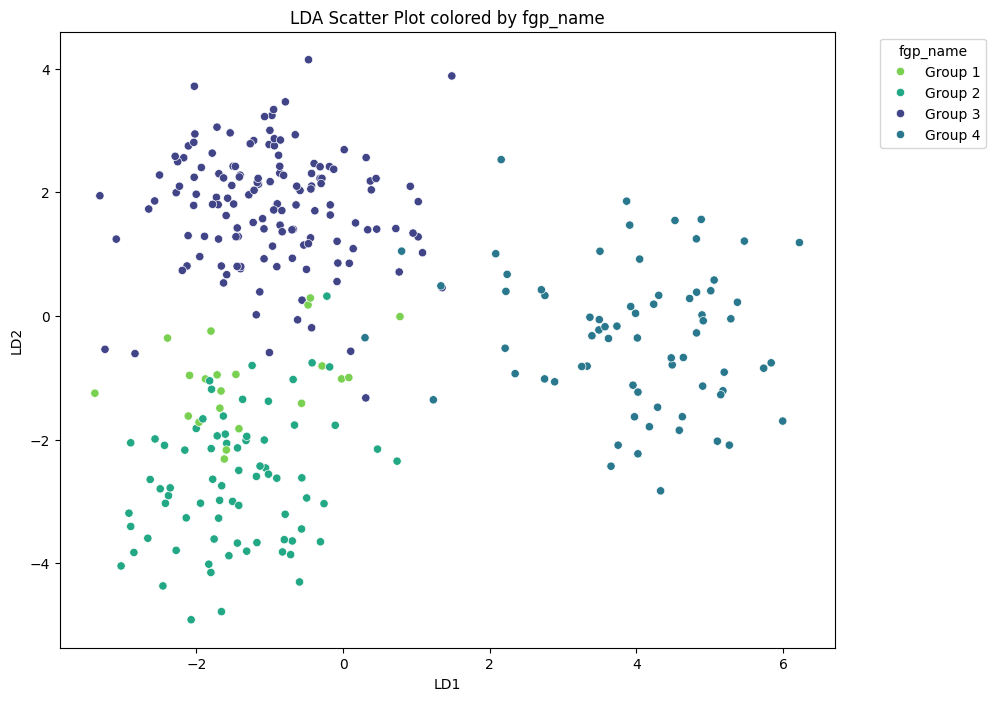

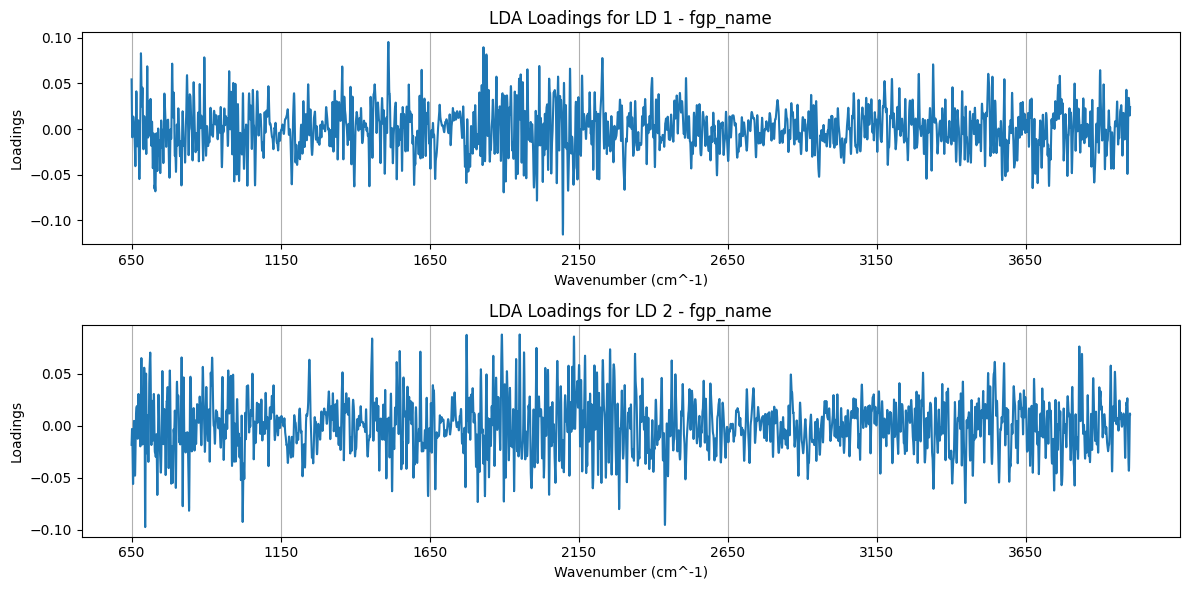

Classification Report for country_name:
              precision    recall  f1-score   support

           0       0.41      0.22      0.28       139
           1       0.00      0.00      0.00        13
           2       0.54      0.76      0.63       152

    accuracy                           0.48       304
   macro avg       0.32      0.33      0.30       304
weighted avg       0.46      0.48      0.44       304

Confusion Matrix for country_name:
[[ 30  13  96]
 [  9   0   4]
 [ 34   2 116]]


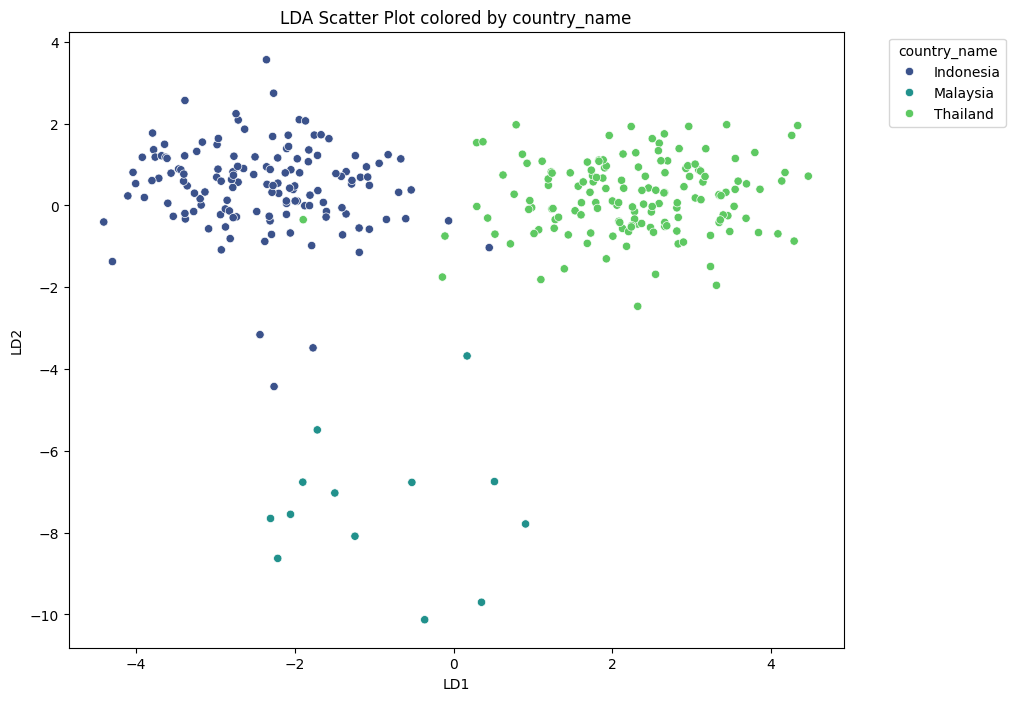

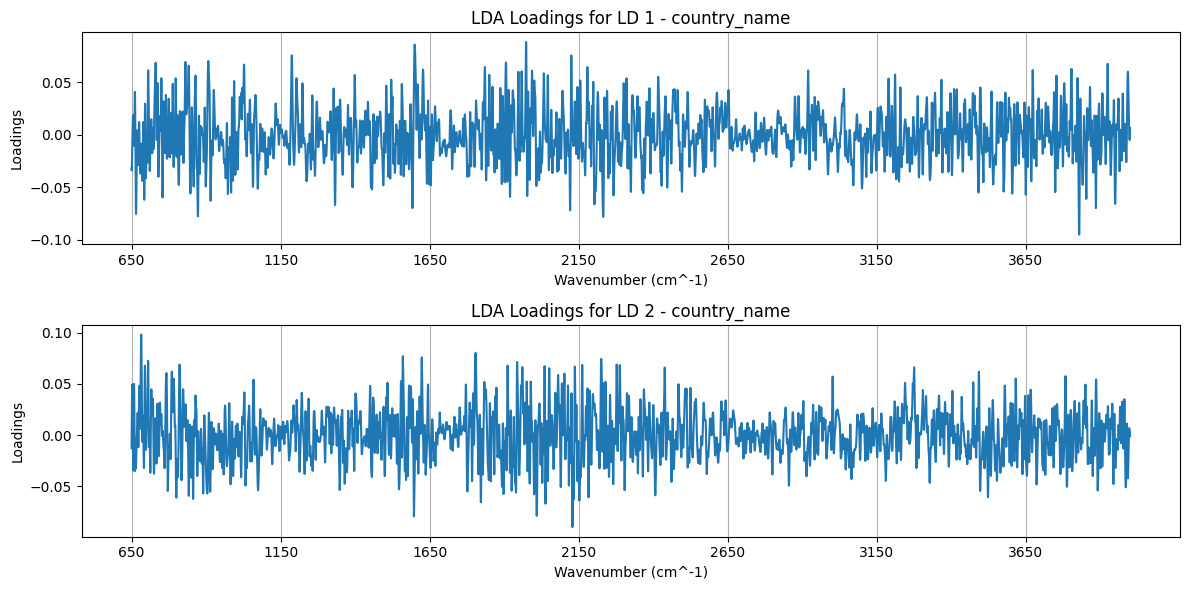

In [25]:
# Define a function to perform LDA and visualize the results
def perform_lda_1(target_column_name, target_label):
    features_lda_1 = data_2.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
    targets_lda_1 = data_2[target_column_name]
    groups_lda_1 = data_2['prov_char']
    
    # Encode the target labels
    label_encoder_lda_1 = LabelEncoder()
    targets_encoded_lda_1 = label_encoder_lda_1.fit_transform(targets_lda_1)
    
    # Standardize the features
    scaler_lda_1 = StandardScaler()
    X_scaled_lda_1 = scaler_lda_1.fit_transform(features_lda_1)
    
    # Perform LDA and LOGO-CV
    lda = LinearDiscriminantAnalysis(n_components=2)
    classifier_lda_1 = LogisticRegression()
    
    logo_lda_1 = LeaveOneGroupOut()
    y_true_lda_1 = []
    y_pred_lda_1 = []
    
    for train_idx_lda_1, test_idx_lda_1 in logo_lda_1.split(X_scaled_lda_1, targets_encoded_lda_1, groups_lda_1):
        X_train_lda_1, X_test_lda_1 = X_scaled_lda_1[train_idx_lda_1], X_scaled_lda_1[test_idx_lda_1]
        y_train_lda_1, y_test_lda_1 = targets_encoded_lda_1[train_idx_lda_1], targets_encoded_lda_1[test_idx_lda_1]
        
        # Fit LDA
        X_train_lda_1_transformed = lda.fit_transform(X_train_lda_1, y_train_lda_1)
        X_test_lda_1_transformed = lda.transform(X_test_lda_1)
        
        # Train classifier
        classifier_lda_1.fit(X_train_lda_1_transformed, y_train_lda_1)
        
        # Predict
        y_pred_lda_1.extend(classifier_lda_1.predict(X_test_lda_1_transformed))
        y_true_lda_1.extend(y_test_lda_1)
    
    # Evaluate the classifier
    print(f"Classification Report for {target_label}:")
    print(classification_report(y_true_lda_1, y_pred_lda_1))
    
    print(f"Confusion Matrix for {target_label}:")
    print(confusion_matrix(y_true_lda_1, y_pred_lda_1))
    
    # Fit LDA for visualization purposes
    X_lda_1_final = lda.fit_transform(X_scaled_lda_1, targets_encoded_lda_1)
    
    # Create a DataFrame for the LDA results
    lda_df = pd.DataFrame(data=X_lda_1_final, columns=['LD1', 'LD2'])
    lda_df[target_label] = targets_lda_1
    
    # Plotting LDA scatter plot
    plt.figure(figsize=(10, 8))
    scatter_lda_1 = sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue=target_label, palette='viridis')
    plt.title(f'LDA Scatter Plot colored by {target_label}')
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    
    # Set legend in alphabetical order
    handles_lda_1, labels_lda_1 = scatter_lda_1.get_legend_handles_labels()
    sorted_labels_lda_1 = sorted(zip(labels_lda_1, handles_lda_1), key=lambda t: t[0])
    labels_lda_1, handles_lda_1 = zip(*sorted_labels_lda_1)
    plt.legend(handles_lda_1, labels_lda_1, title=target_label, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()
    
    # Plotting the loadings
    loadings_lda_1 = lda.scalings_
    wavenumbers = np.arange(650, 4000, (4000-650)/loadings_lda_1.shape[0])
    
    plt.figure(figsize=(12, 6))
    
    # Plot loadings for first component
    plt.subplot(2, 1, 1)
    plt.plot(wavenumbers, loadings_lda_1[:, 0])
    plt.title(f'LDA Loadings for LD 1 - {target_label}')
    plt.xlabel('Wavenumber (cm^-1)')
    plt.ylabel('Loadings')
    plt.xticks(ticks=np.arange(650, 4000, 500), labels=np.arange(650, 4000, 500))
    plt.grid(True, which='both', axis='x')
    
    # Plot loadings for second component
    plt.subplot(2, 1, 2)
    plt.plot(wavenumbers, loadings_lda_1[:, 1])
    plt.title(f'LDA Loadings for LD 2 - {target_label}')
    plt.xlabel('Wavenumber (cm^-1)')
    plt.ylabel('Loadings')
    plt.xticks(ticks=np.arange(650, 4000, 500), labels=np.arange(650, 4000, 500))
    plt.grid(True, which='both', axis='x')
    
    plt.tight_layout()
    plt.show()

# Perform LDA for different target variables
perform_lda_1('tgp_name', 'tgp_name')
perform_lda_1('fgp_name', 'fgp_name')
perform_lda_1('country_name', 'country_name')

In [26]:
def plot_lda_loadings(loadings, wavenumbers, target_label):
    plt.figure(figsize=(12, 6))
    
    # Plot loadings for first component
    plt.subplot(2, 1, 1)
    plt.plot(wavenumbers, loadings[:, 0])
    plt.title(f'LDA Loadings for LD 1 - {target_label}')
    plt.xlabel('Wavenumber (cm^-1)')
    plt.ylabel('Loadings')
    plt.xticks(ticks=np.arange(650, 4000, 500), labels=np.arange(650, 4000, 500))
    plt.grid(True, which='both', axis='x')
    
    # Plot loadings for second component
    plt.subplot(2, 1, 2)
    plt.plot(wavenumbers, loadings[:, 1])
    plt.title(f'LDA Loadings for LD 2 - {target_label}')
    plt.xlabel('Wavenumber (cm^-1)')
    plt.ylabel('Loadings')
    plt.xticks(ticks=np.arange(650, 4000, 500), labels=np.arange(650, 4000, 500))
    plt.grid(True, which='both', axis='x')
    
    plt.tight_layout()
    plt.show()


In [27]:
def most_influencing_wavenumbers(loadings, wavenumbers):
    influencing_wavenumbers = []
    for i in range(loadings.shape[1]):
        loading_series = pd.Series(loadings[:, i], index=wavenumbers)
        top_50 = loading_series.abs().nlargest(50).index
        influencing_wavenumbers.append((f'LD{i+1}', top_50))
    return influencing_wavenumbers

def print_influencing_wavenumbers_table(influencing_wavenumbers):
    for ld, wavenumbers in influencing_wavenumbers:
        print(f'\nTop 50 influencing wavenumbers for {ld}:')
        print(wavenumbers)


Classification Report for dgp_name:
              precision    recall  f1-score   support

           0       0.04      0.05      0.05        55
           1       0.78      0.73      0.75       249

    accuracy                           0.61       304
   macro avg       0.41      0.39      0.40       304
weighted avg       0.64      0.61      0.63       304

Confusion Matrix for dgp_name:
[[  3  52]
 [ 67 182]]


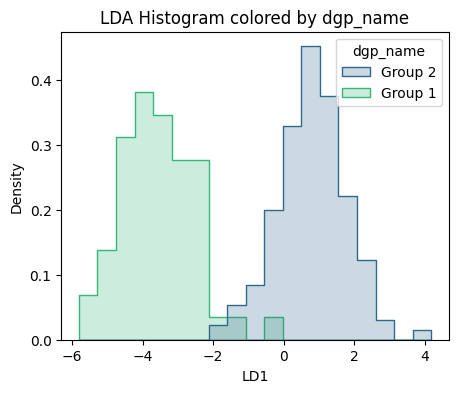

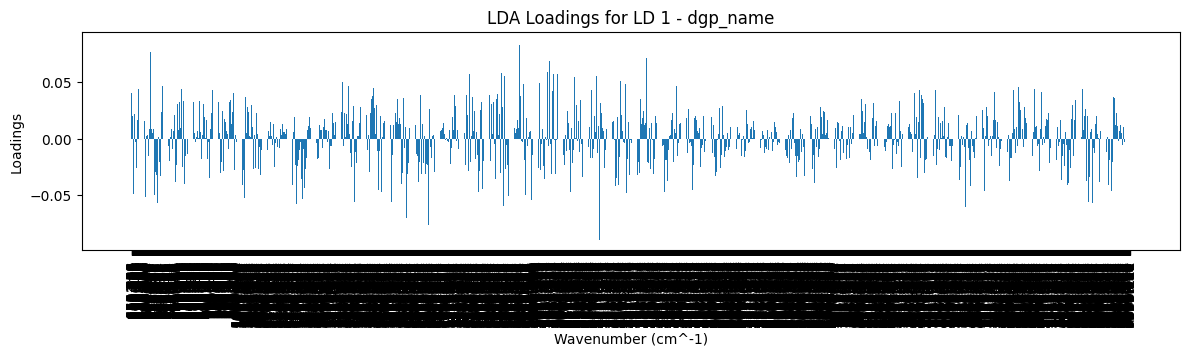

Classification Report for thnoth_name:
              precision    recall  f1-score   support

           0       0.57      0.36      0.44       152
           1       0.53      0.74      0.62       152

    accuracy                           0.55       304
   macro avg       0.55      0.55      0.53       304
weighted avg       0.55      0.55      0.53       304

Confusion Matrix for thnoth_name:
[[ 54  98]
 [ 40 112]]


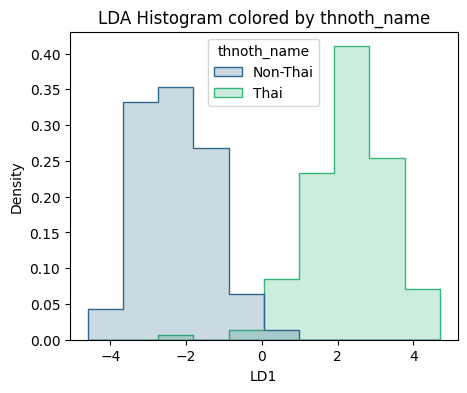

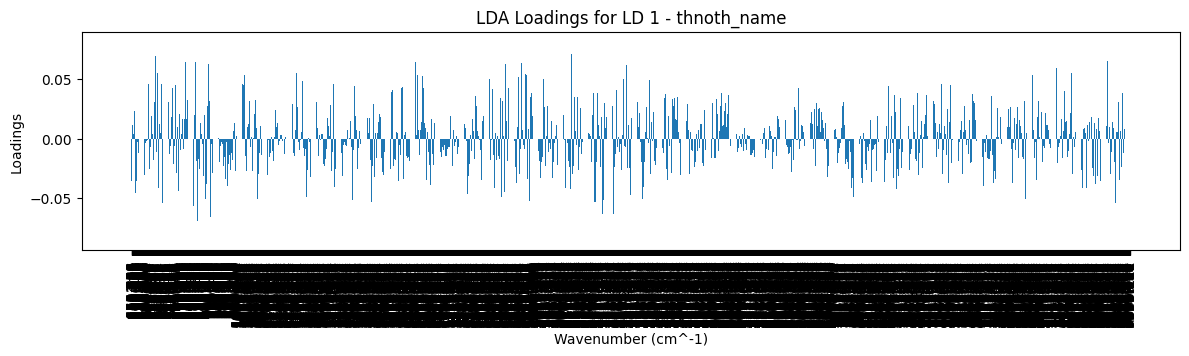

Classification Report for tgp_name:
              precision    recall  f1-score   support

           0       0.10      0.07      0.08        27
           1       0.45      0.62      0.52       142
           2       0.35      0.23      0.28       135

    accuracy                           0.40       304
   macro avg       0.30      0.31      0.29       304
weighted avg       0.38      0.40      0.37       304

Confusion Matrix for tgp_name:
[[ 2 17  8]
 [ 5 88 49]
 [14 90 31]]


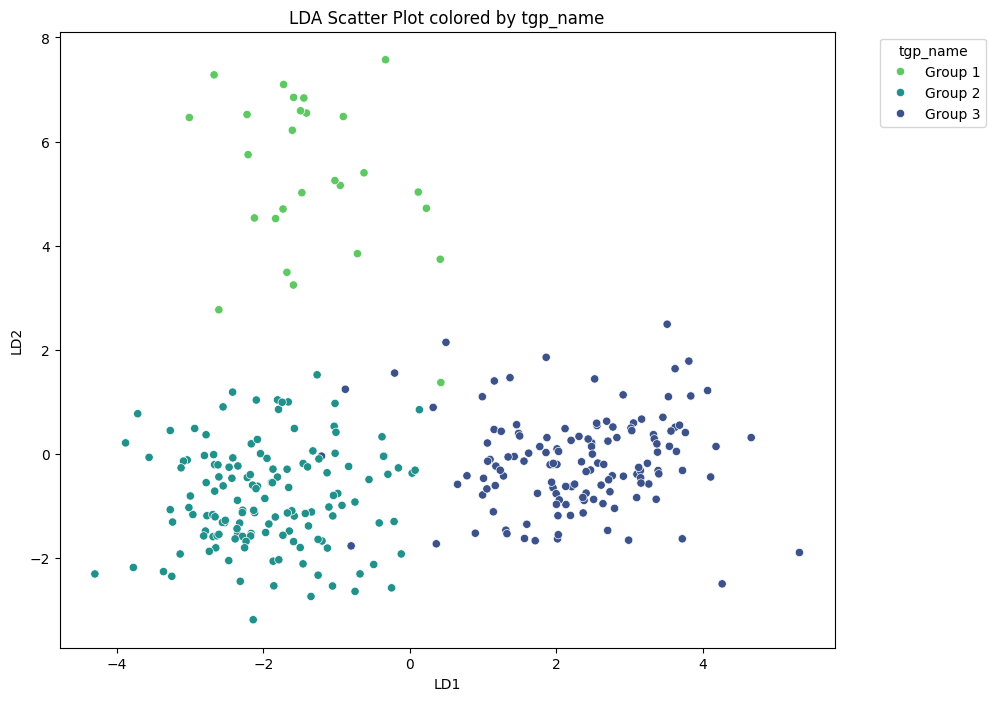

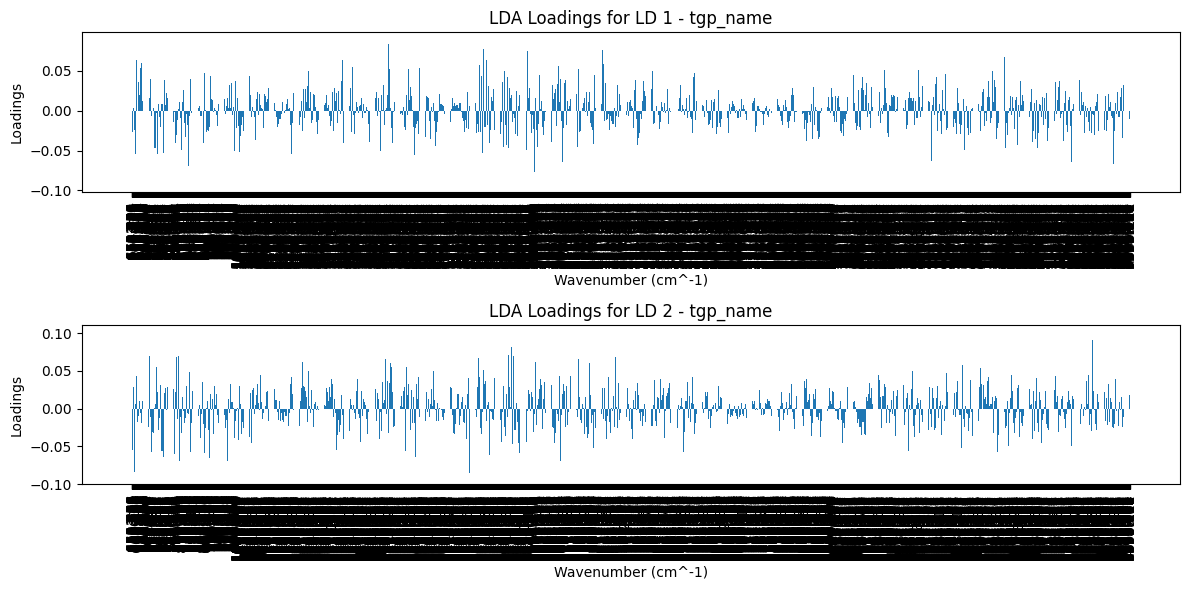

Classification Report for fgp_name:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.23      0.39      0.29        74
           2       0.25      0.23      0.24       139
           3       0.06      0.03      0.04        69

    accuracy                           0.21       304
   macro avg       0.13      0.16      0.14       304
weighted avg       0.18      0.21      0.19       304

Confusion Matrix for fgp_name:
[[ 0  6 15  1]
 [ 3 29 41  1]
 [11 67 32 29]
 [ 2 26 39  2]]


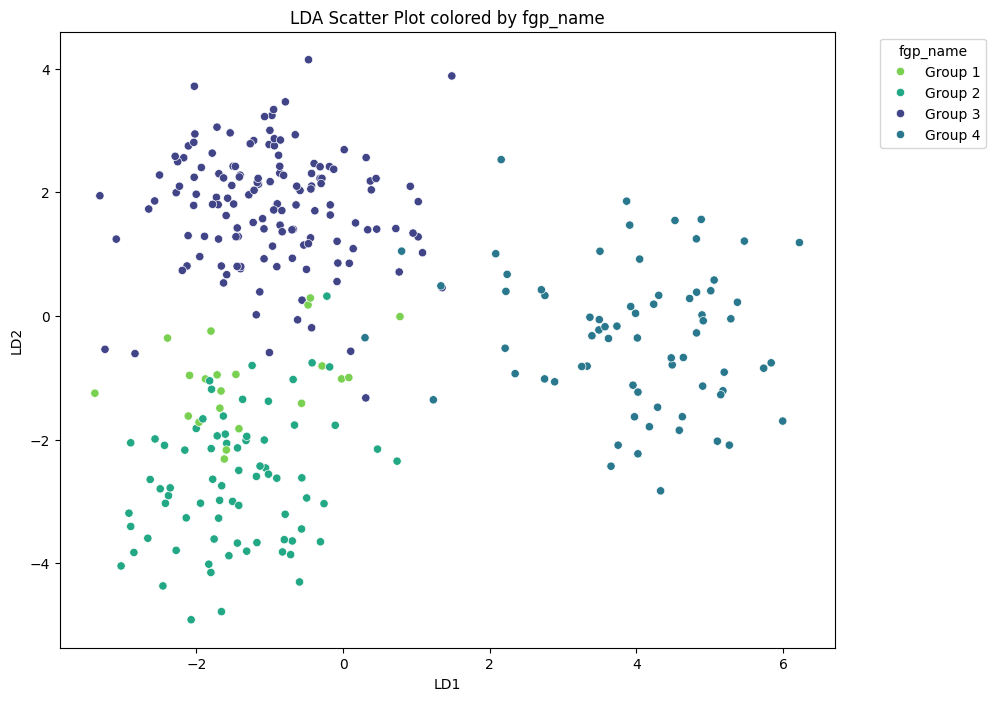

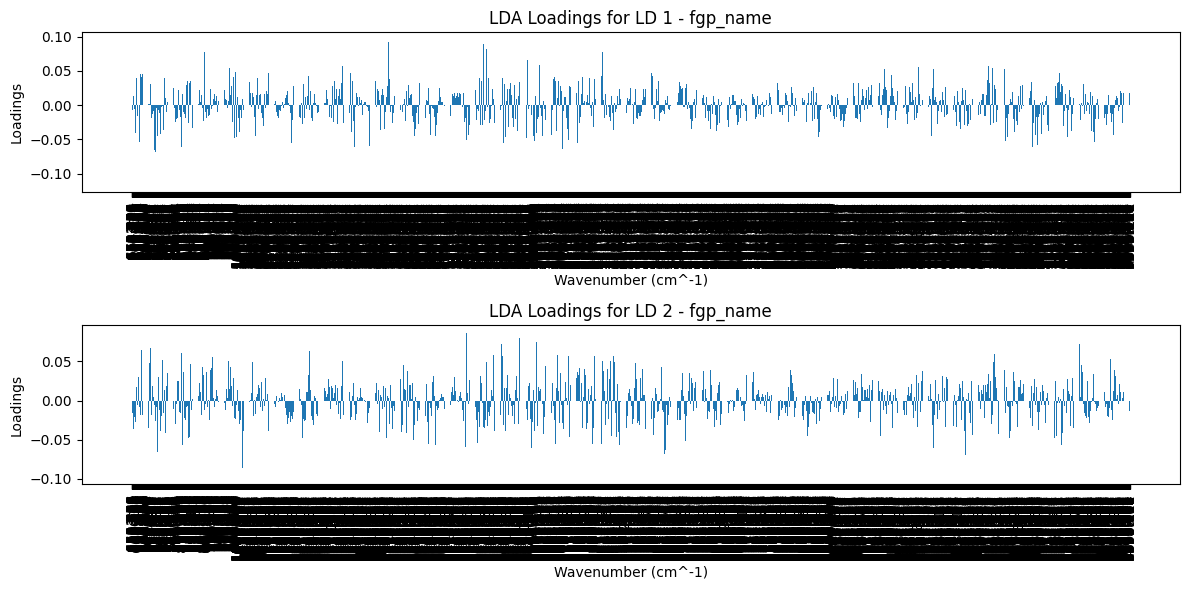

Classification Report for country_name:
              precision    recall  f1-score   support

           0       0.41      0.22      0.28       139
           1       0.00      0.00      0.00        13
           2       0.54      0.76      0.63       152

    accuracy                           0.48       304
   macro avg       0.32      0.33      0.30       304
weighted avg       0.46      0.48      0.44       304

Confusion Matrix for country_name:
[[ 30  13  96]
 [  9   0   4]
 [ 34   2 116]]


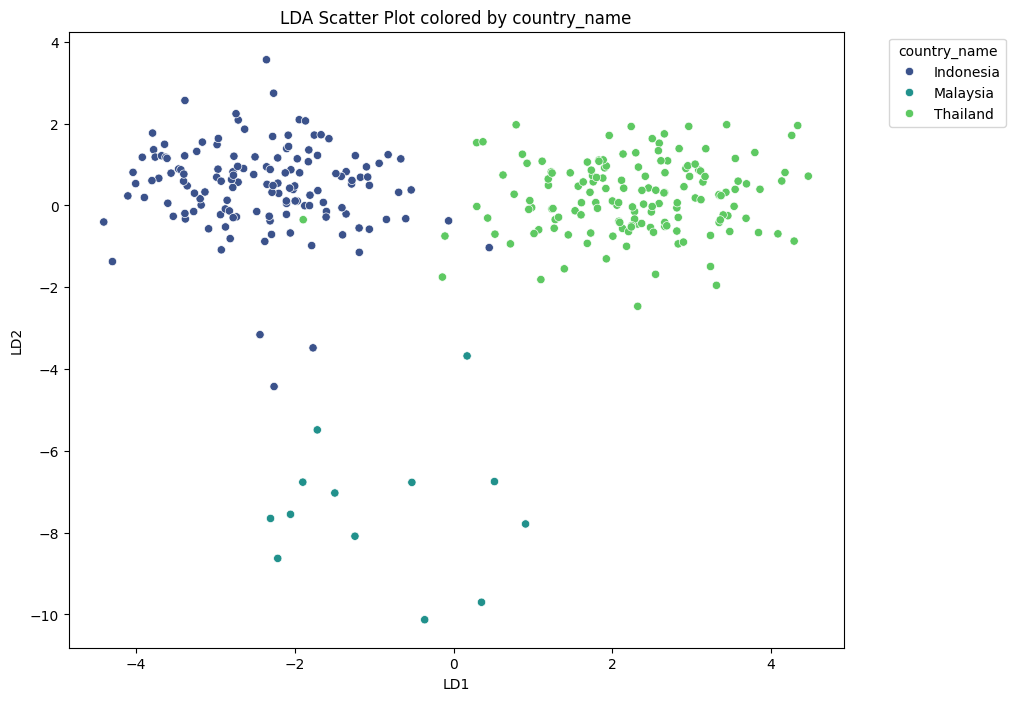

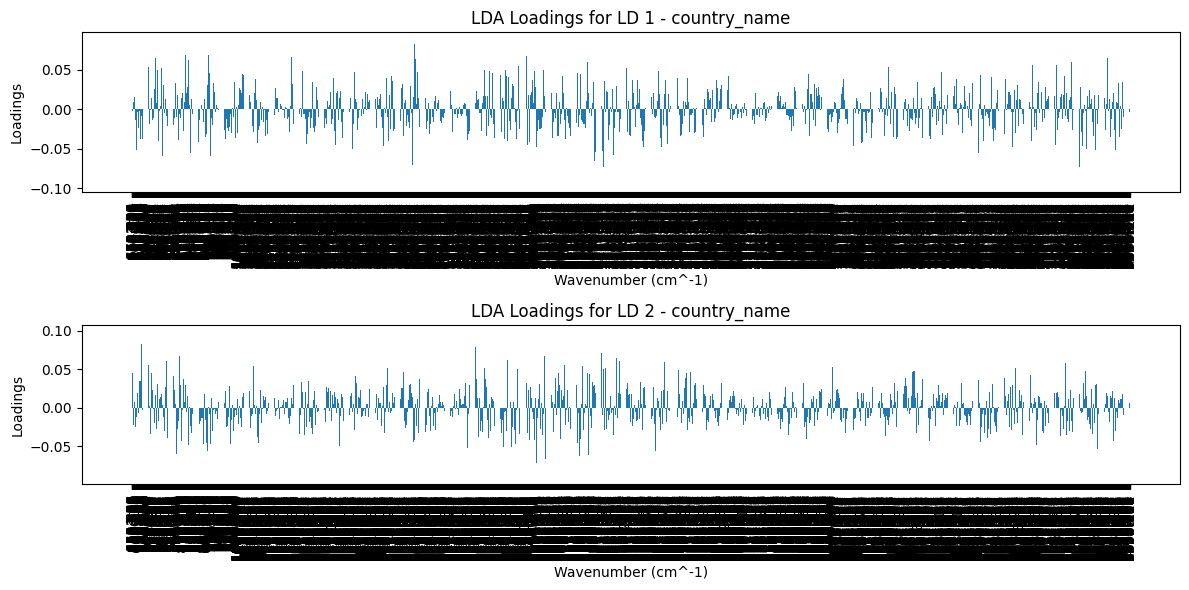

In [24]:
# Define a function to perform LDA and visualize the results
def perform_lda_2(target_column_name, target_label, n_components=2):
    features_lda_2 = data_2.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
    targets_lda_2 = data_2[target_column_name]
    groups_lda_2 = data_2['prov_char']
    
    # Encode the target labels
    label_encoder_lda_2 = LabelEncoder()
    targets_encoded_lda_2 = label_encoder_lda_2.fit_transform(targets_lda_2)
    
    # Standardize the features
    scaler_lda_2 = StandardScaler()
    X_scaled_lda_2 = scaler_lda_2.fit_transform(features_lda_2)
    
    # Perform LDA and LOGO-CV
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    classifier_lda_2 = LogisticRegression()
    
    logo_lda_2 = LeaveOneGroupOut()
    y_true_lda_2 = []
    y_pred_lda_2 = []
    
    for train_idx_lda_2, test_idx_lda_2 in logo_lda_2.split(X_scaled_lda_2, targets_encoded_lda_2, groups_lda_2):
        X_train_lda_2, X_test_lda_2 = X_scaled_lda_2[train_idx_lda_2], X_scaled_lda_2[test_idx_lda_2]
        y_train_lda_2, y_test_lda_2 = targets_encoded_lda_2[train_idx_lda_2], targets_encoded_lda_2[test_idx_lda_2]
        
        # Fit LDA
        X_train_lda_2_transformed = lda.fit_transform(X_train_lda_2, y_train_lda_2)
        X_test_lda_2_transformed = lda.transform(X_test_lda_2)
        
        # Train classifier
        classifier_lda_2.fit(X_train_lda_2_transformed, y_train_lda_2)
        
        # Predict
        y_pred_lda_2.extend(classifier_lda_2.predict(X_test_lda_2_transformed))
        y_true_lda_2.extend(y_test_lda_2)
    
    # Evaluate the classifier
    print(f"Classification Report for {target_label}:")
    print(classification_report(y_true_lda_2, y_pred_lda_2))
    
    print(f"Confusion Matrix for {target_label}:")
    print(confusion_matrix(y_true_lda_2, y_pred_lda_2))
    
    # Fit LDA for visualization purposes
    X_lda_2_final = lda.fit_transform(X_scaled_lda_2, targets_encoded_lda_2)
    
    # Create a DataFrame for the LDA results
    lda_df = pd.DataFrame(data=X_lda_2_final, columns=[f'LD{i+1}' for i in range(n_components)])
    lda_df[target_label] = targets_lda_2
    
    if n_components == 1:
        # Plotting LDA histogram for binary classification
        plt.figure(figsize=(5, 4))
        sns.histplot(data=lda_df, x='LD1', hue=target_label, element='step', stat='density', common_norm=False, palette='viridis')
        plt.title(f'LDA Histogram colored by {target_label}')
        plt.xlabel('LD1')
        plt.ylabel('Density')
        plt.show()
    else:
        # Plotting LDA scatter plot for multi-class classification
        plt.figure(figsize=(10, 8))
        scatter_lda_2 = sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue=target_label, palette='viridis')
        plt.title(f'LDA Scatter Plot colored by {target_label}')
        plt.xlabel('LD1')
        plt.ylabel('LD2')
        
        # Set legend in alphabetical order
        handles_lda_2, labels_lda_2 = scatter_lda_2.get_legend_handles_labels()
        sorted_labels_lda_2 = sorted(zip(labels_lda_2, handles_lda_2), key=lambda t: t[0])
        labels_lda_2, handles_lda_2 = zip(*sorted_labels_lda_2)
        plt.legend(handles_lda_2, labels_lda_2, title=target_label, bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.show()
    
    # Plotting the loadings
    loadings_lda_2 = lda.scalings_
    wavenumbers = features_lda_2.columns  # Assuming feature columns are named by wavenumber
    
    plt.figure(figsize=(12, 6))
    
    # Plot loadings for first component
    plt.subplot(2, 1, 1)
    plt.bar(wavenumbers, loadings_lda_2[:, 0])
    plt.title(f'LDA Loadings for LD 1 - {target_label}')
    plt.xlabel('Wavenumber (cm^-1)')
    plt.ylabel('Loadings')
    plt.xticks(rotation=90)
    
    if n_components > 1:
        # Plot loadings for second component
        plt.subplot(2, 1, 2)
        plt.bar(wavenumbers, loadings_lda_2[:, 1])
        plt.title(f'LDA Loadings for LD 2 - {target_label}')
        plt.xlabel('Wavenumber (cm^-1)')
        plt.ylabel('Loadings')
        plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

# Perform LDA for different target variables
perform_lda_2('dgp_name', 'dgp_name', n_components=1)  # Binary classification
perform_lda_2('thnoth_name', 'thnoth_name', n_components=1)  # Binary classification

perform_lda_2('tgp_name', 'tgp_name', n_components=2)  # Multi-class classification
perform_lda_2('fgp_name', 'fgp_name', n_components=2)  # Multi-class classification
perform_lda_2('country_name', 'country_name', n_components=2)  # Multi-class classification

Classification Report for dgp_name:
              precision    recall  f1-score   support

           0       0.04      0.05      0.05        55
           1       0.78      0.73      0.75       249

    accuracy                           0.61       304
   macro avg       0.41      0.39      0.40       304
weighted avg       0.64      0.61      0.63       304

Confusion Matrix for dgp_name:
[[  3  52]
 [ 67 182]]


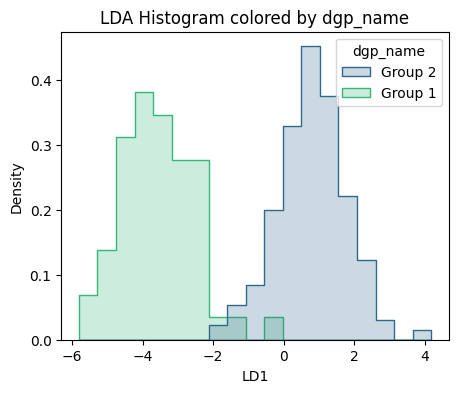

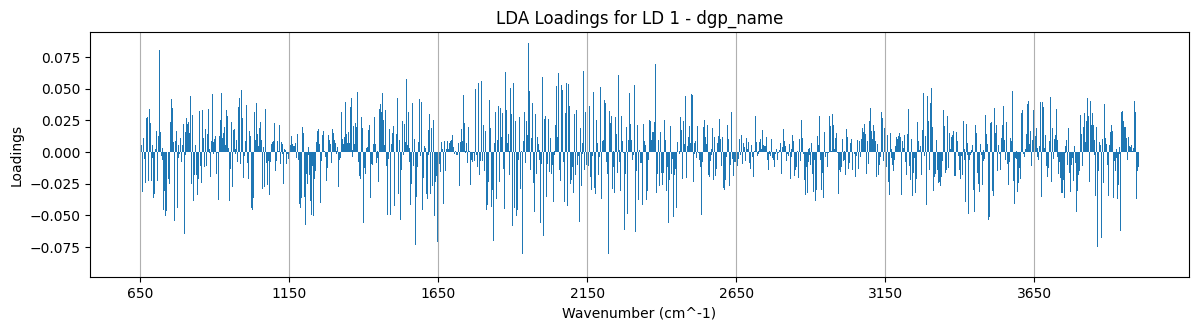


Top 30 influencing wavenumbers for LD1:
Index([2220.147, 2219.665, 1931.842, 1952.091, 1951.608,  1931.36,  714.015,
        2220.63, 1932.324, 1952.573, 2219.183,  713.533, 1646.429,  695.694,
       3861.755,  714.497, 3862.237, 1573.147,  695.212, 2209.059, 1951.126,
       1573.629,   2377.8,  798.867, 1646.911, 1930.877, 1835.418,   799.35,
       2208.577, 1572.665],
      dtype='float64')
Classification Report for thnoth_name:
              precision    recall  f1-score   support

           0       0.57      0.36      0.44       152
           1       0.53      0.74      0.62       152

    accuracy                           0.55       304
   macro avg       0.55      0.55      0.53       304
weighted avg       0.55      0.55      0.53       304

Confusion Matrix for thnoth_name:
[[ 54  98]
 [ 40 112]]


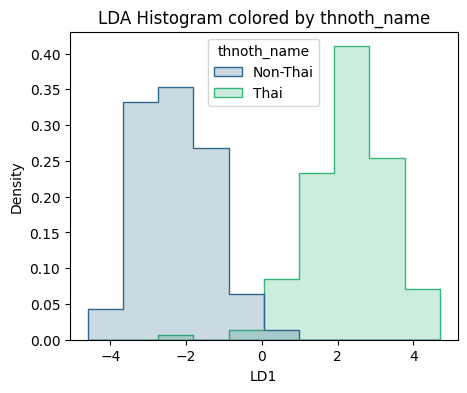

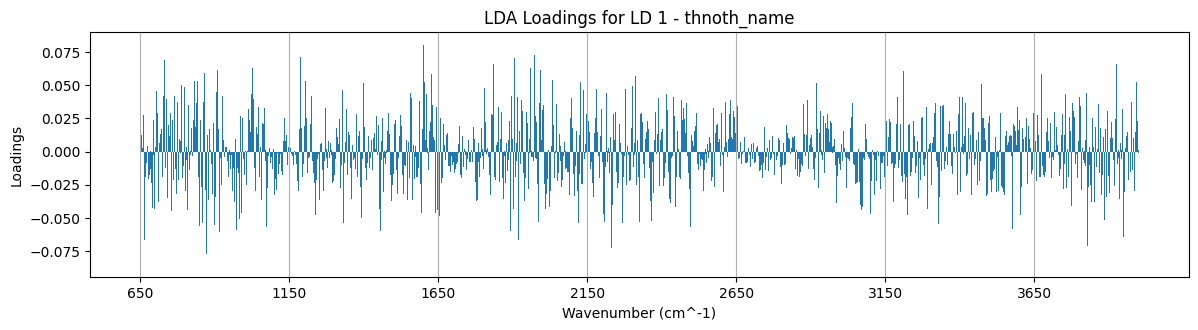


Top 30 influencing wavenumbers for LD1:
Index([ 664.839,  665.321, 1973.786,  664.357, 3829.453, 2125.653, 1600.145,
       1974.268, 1599.663, 1973.304, 1600.628, 3828.971,  2125.17,  872.149,
       3829.935,  705.337, 2121.314,  1601.11,  871.667, 2121.796, 1599.181,
        705.819,  872.631, 2179.168, 2231.718, 2231.236, 1972.822, 1027.391,
       1601.592,  830.687],
      dtype='float64')
Classification Report for tgp_name:
              precision    recall  f1-score   support

           0       0.10      0.07      0.08        27
           1       0.45      0.62      0.52       142
           2       0.35      0.23      0.28       135

    accuracy                           0.40       304
   macro avg       0.30      0.31      0.29       304
weighted avg       0.38      0.40      0.37       304

Confusion Matrix for tgp_name:
[[ 2 17  8]
 [ 5 88 49]
 [14 90 31]]


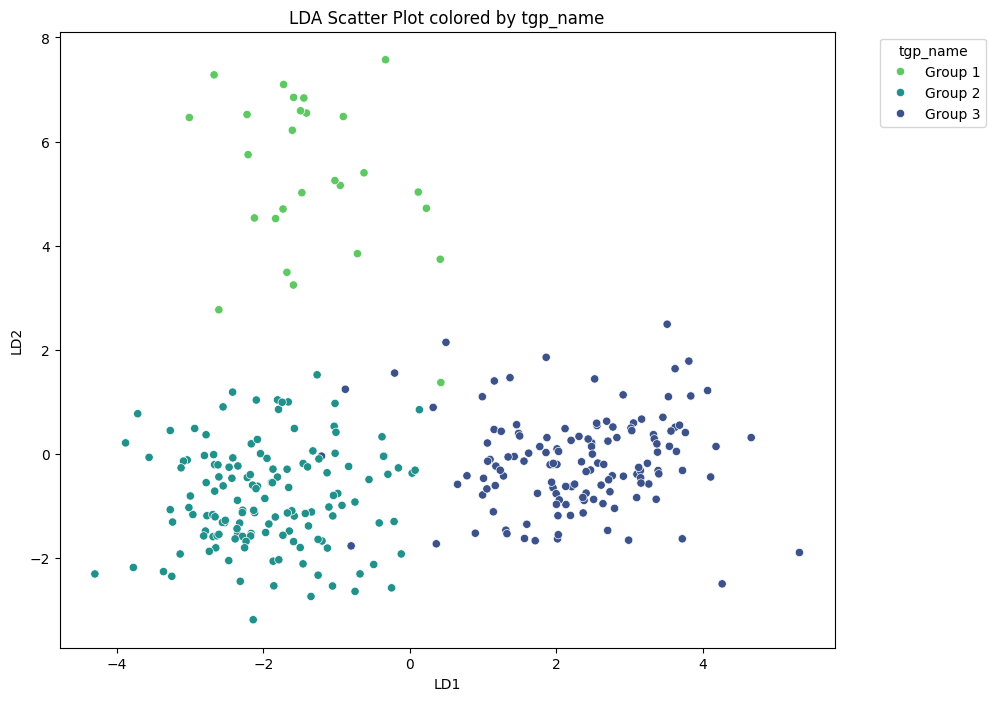

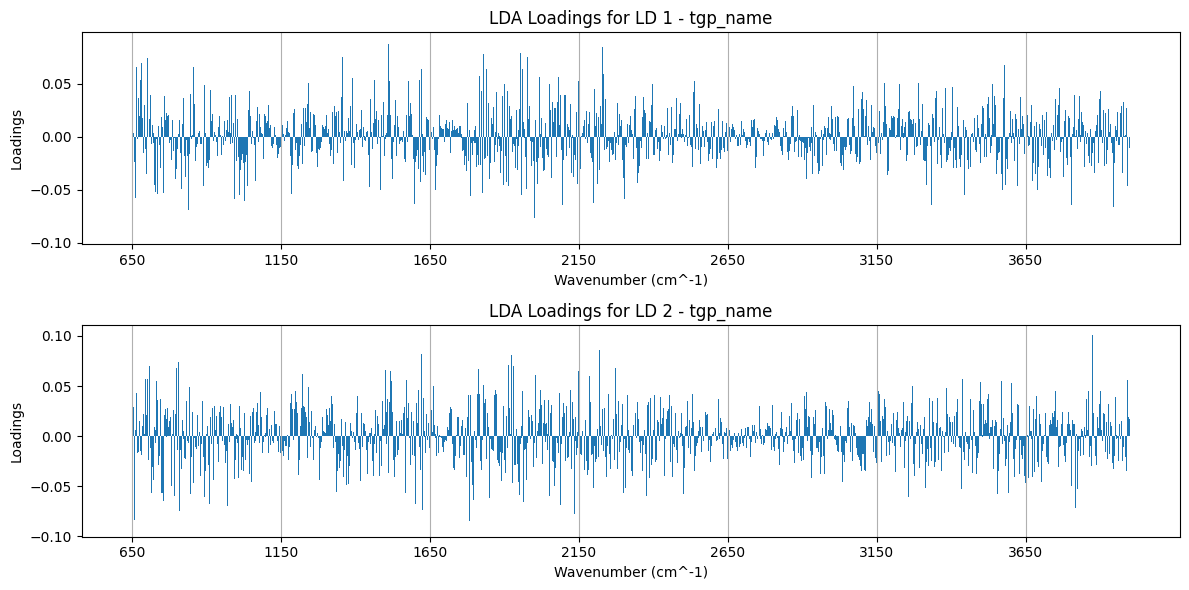


Top 30 influencing wavenumbers for LD1:
Index([2097.208, 2096.726, 2231.236, 2230.754, 1511.436, 2000.784, 1510.954,
       2231.718,  798.867,  798.385,  2097.69, 2230.272, 2001.266, 1511.918,
       2000.302, 1623.769, 2010.427, 1623.287, 1510.472, 1955.465, 2096.243,
         2232.2, 1954.983, 2198.452,  681.713, 1356.676, 1830.597,  649.893,
       2001.749, 2010.909],
      dtype='float64')

Top 30 influencing wavenumbers for LD2:
Index([3875.254, 3874.772, 3875.736, 1784.314,  3874.29, 1795.403, 2187.364,
       1795.885, 2137.223, 2136.741,  714.979, 2187.846,  715.461, 2220.147,
       1783.832, 2219.665,  659.536, 1794.921, 1784.796,  659.054, 1622.805,
       1622.323,  1924.61, 2274.627, 3648.177, 2186.881, 1796.367, 3876.218,
        2220.63, 2274.145],
      dtype='float64')
Classification Report for fgp_name:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.23      0.39      0.29        74
 

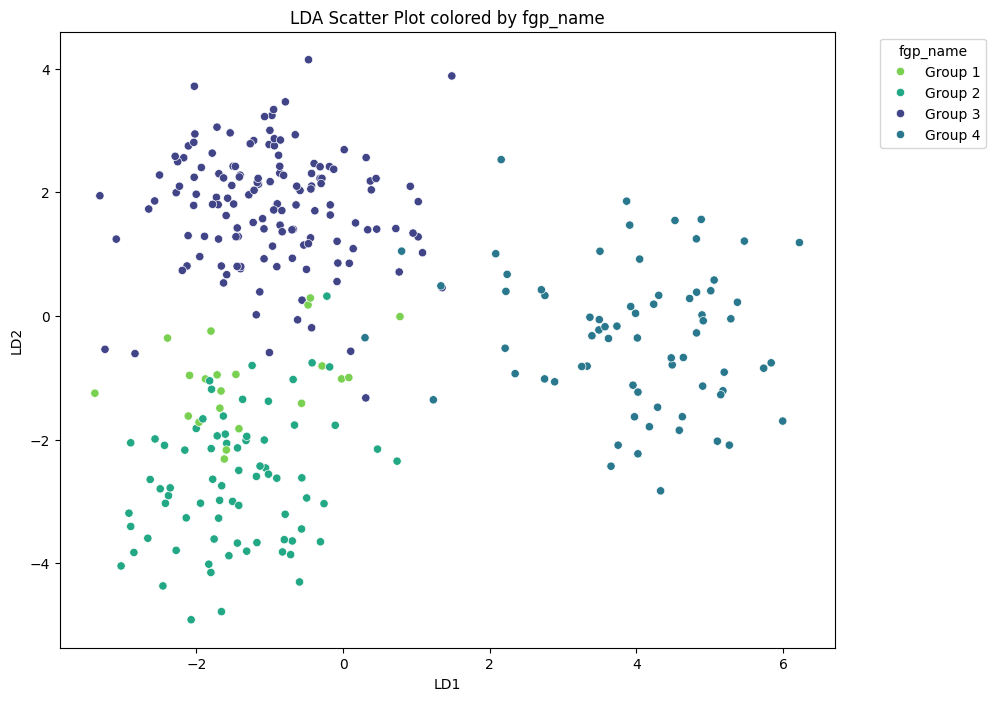

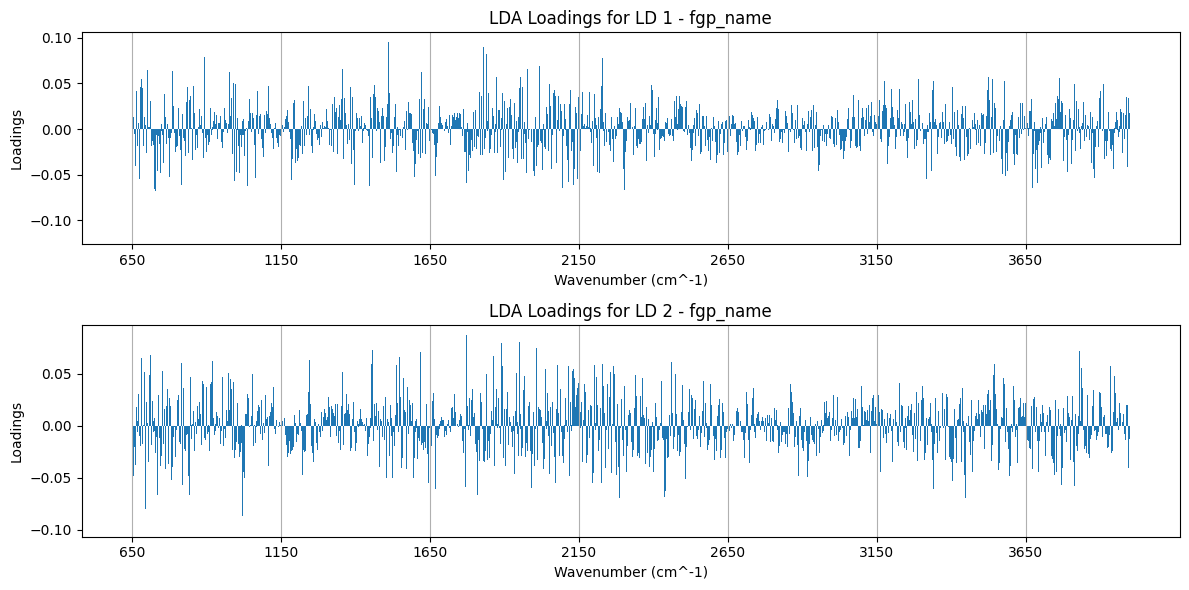


Top 30 influencing wavenumbers for LD1:
Index([2097.208, 2096.726,  2097.69, 1511.436, 1510.954, 1511.918, 2096.243,
       1830.597, 1510.472, 1831.079,   1512.4,  681.231, 1840.722,  1840.24,
        681.713,  893.844, 2009.945, 1830.115, 2229.308, 2098.172,  680.749,
        2229.79, 1841.204,  894.327, 2010.427, 1839.757,  1509.99, 2228.826,
       2230.272, 1512.882],
      dtype='float64')

Top 30 influencing wavenumbers for LD2:
Index([ 695.694, 2439.511,  695.212,  1022.57, 2439.028, 2439.993, 1023.052,
       1952.091, 1892.308,  1774.19, 1022.087, 1773.707, 2134.331, 1891.826,
        1892.79, 1952.573, 2133.849, 2440.475, 1456.957, 2438.546, 1457.439,
         842.74, 1023.534,  696.177, 2285.715, 1951.608, 1891.344, 1774.672,
       1456.475,  843.222],
      dtype='float64')

Top 30 influencing wavenumbers for LD3:
Index([2136.741, 2137.223, 2136.259,  715.461,  714.979, 2051.407, 2137.706,
        970.501, 2050.925,  970.019, 1902.915, 1914.003, 1914.485,  970.983,
     

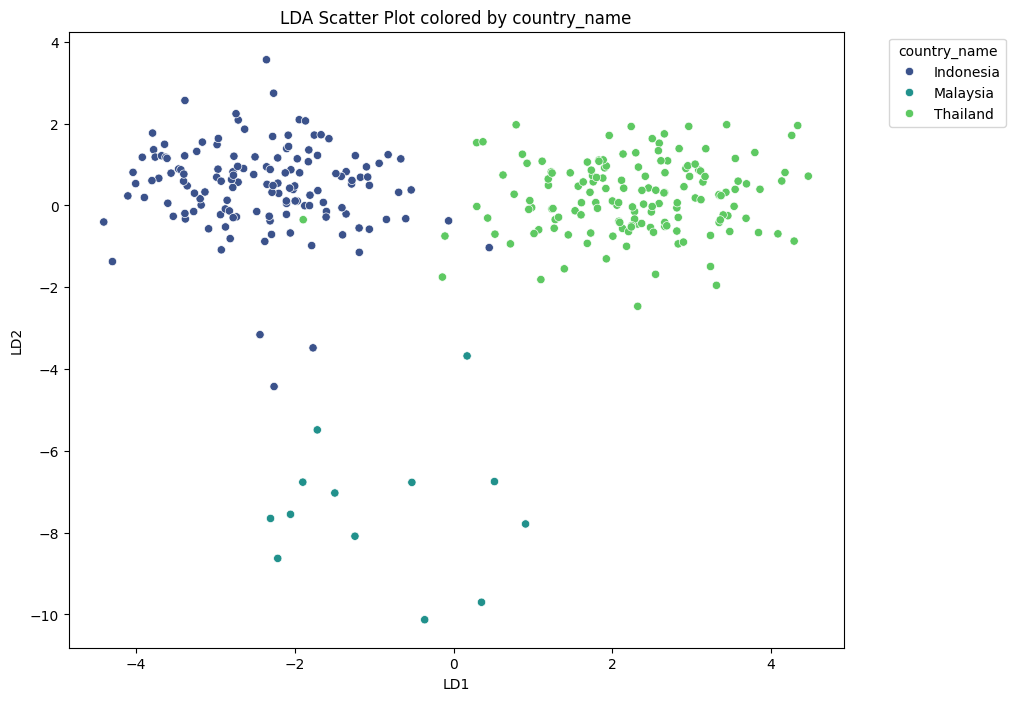

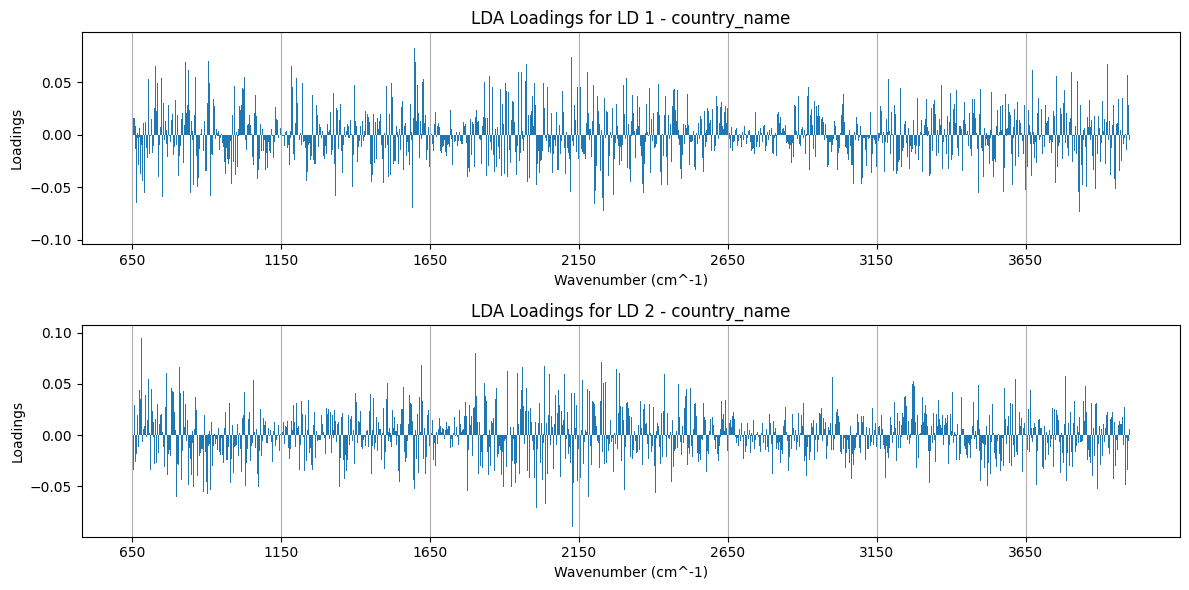


Top 30 influencing wavenumbers for LD1:
Index([3829.453, 3828.971, 3829.935, 1973.786, 1973.304, 1600.145, 1599.663,
       3828.489, 1600.628, 1599.181, 1974.268,  1601.11, 1972.822,   2232.2,
       2232.683,  872.631, 1598.699,  872.149, 2231.718, 1187.454,  664.839,
        2125.17, 1601.592, 2125.653, 1187.936,  665.321, 3830.417, 2233.165,
       1186.971, 2121.314],
      dtype='float64')

Top 30 influencing wavenumbers for LD2:
Index([ 682.195,  681.713,  682.677, 2129.027,  2129.51,  681.231,  683.159,
       2128.545, 1804.081, 1803.599, 1597.253, 2009.462, 1804.563,  2008.98,
        1560.13, 1596.771, 1803.117, 1623.287, 1623.769, 2009.945, 1597.735,
       1559.648, 2225.451, 2225.933, 1805.045,  705.337, 1560.612, 2226.415,
       1943.412, 2008.498],
      dtype='float64')


In [30]:
# Define a function to perform LDA and visualize the results
def perform_lda_2(target_column_name, target_label, n_components=2):
    features_lda_2 = data_2.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
    targets_lda_2 = data_2[target_column_name]
    groups_lda_2 = data_2['prov_char']
    
    # Encode the target labels
    label_encoder_lda_2 = LabelEncoder()
    targets_encoded_lda_2 = label_encoder_lda_2.fit_transform(targets_lda_2)
    
    # Standardize the features
    scaler_lda_2 = StandardScaler()
    X_scaled_lda_2 = scaler_lda_2.fit_transform(features_lda_2)
    
    # Perform LDA and LOGO-CV
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    classifier_lda_2 = LogisticRegression()
    
    logo_lda_2 = LeaveOneGroupOut()
    y_true_lda_2 = []
    y_pred_lda_2 = []
    
    for train_idx_lda_2, test_idx_lda_2 in logo_lda_2.split(X_scaled_lda_2, targets_encoded_lda_2, groups_lda_2):
        X_train_lda_2, X_test_lda_2 = X_scaled_lda_2[train_idx_lda_2], X_scaled_lda_2[test_idx_lda_2]
        y_train_lda_2, y_test_lda_2 = targets_encoded_lda_2[train_idx_lda_2], targets_encoded_lda_2[test_idx_lda_2]
        
        # Fit LDA
        X_train_lda_2_transformed = lda.fit_transform(X_train_lda_2, y_train_lda_2)
        X_test_lda_2_transformed = lda.transform(X_test_lda_2)
        
        # Train classifier
        classifier_lda_2.fit(X_train_lda_2_transformed, y_train_lda_2)
        
        # Predict
        y_pred_lda_2.extend(classifier_lda_2.predict(X_test_lda_2_transformed))
        y_true_lda_2.extend(y_test_lda_2)
    
    # Evaluate the classifier
    print(f"Classification Report for {target_label}:")
    print(classification_report(y_true_lda_2, y_pred_lda_2))
    
    print(f"Confusion Matrix for {target_label}:")
    print(confusion_matrix(y_true_lda_2, y_pred_lda_2))
    
    # Fit LDA for visualization purposes
    X_lda_2_final = lda.fit_transform(X_scaled_lda_2, targets_encoded_lda_2)
    
    # Create a DataFrame for the LDA results
    lda_df = pd.DataFrame(data=X_lda_2_final, columns=[f'LD{i+1}' for i in range(n_components)])
    lda_df[target_label] = targets_lda_2
    
    if n_components == 1:
        # Plotting LDA histogram for binary classification
        plt.figure(figsize=(5, 4))
        sns.histplot(data=lda_df, x='LD1', hue=target_label, element='step', stat='density', common_norm=False, palette='viridis')
        plt.title(f'LDA Histogram colored by {target_label}')
        plt.xlabel('LD1')
        plt.ylabel('Density')
        plt.show()
    else:
        # Plotting LDA scatter plot for multi-class classification
        plt.figure(figsize=(10, 8))
        scatter_lda_2 = sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue=target_label, palette='viridis')
        plt.title(f'LDA Scatter Plot colored by {target_label}')
        plt.xlabel('LD1')
        plt.ylabel('LD2')
        
        # Set legend in alphabetical order
        handles_lda_2, labels_lda_2 = scatter_lda_2.get_legend_handles_labels()
        sorted_labels_lda_2 = sorted(zip(labels_lda_2, handles_lda_2), key=lambda t: t[0])
        labels_lda_2, handles_lda_2 = zip(*sorted_labels_lda_2)
        plt.legend(handles_lda_2, labels_lda_2, title=target_label, bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.show()

    # Visualize loadings with bar charts
    def plot_lda_loadings(loadings, wavenumbers, target_label):
        plt.figure(figsize=(12, 6))
        
        # Bar chart for first component
        plt.subplot(2, 1, 1)
        plt.bar(wavenumbers, loadings[:, 0])
        plt.title(f'LDA Loadings for LD 1 - {target_label}')
        plt.xlabel('Wavenumber (cm^-1)')
        plt.ylabel('Loadings')
        plt.xticks(ticks=np.arange(650, 4000, 500), labels=np.arange(650, 4000, 500))
        plt.grid(True, which='both', axis='x')
        
        if n_components > 1:
            # Bar chart for second component
            plt.subplot(2, 1, 2)
            plt.bar(wavenumbers, loadings[:, 1])
            plt.title(f'LDA Loadings for LD 2 - {target_label}')
            plt.xlabel('Wavenumber (cm^-1)')
            plt.ylabel('Loadings')
            plt.xticks(ticks=np.arange(650, 4000, 500), labels=np.arange(650, 4000, 500))
            plt.grid(True, which='both', axis='x')
        
        plt.tight_layout()
        plt.show()
    
    # Plotting the loadings
    loadings_lda_2 = lda.scalings_
    wavenumbers = features_lda_2.columns.astype(float)  # Assuming feature columns are named by wavenumber
    plot_lda_loadings(loadings_lda_2, wavenumbers, target_label)

    # Table of 30 most influencing wavenumbers
    def most_influencing_wavenumbers(loadings, wavenumbers):
        influencing_wavenumbers = []
        for i in range(loadings.shape[1]):
            loading_series = pd.Series(loadings[:, i], index=wavenumbers)
            top_30 = loading_series.abs().nlargest(30).index
            influencing_wavenumbers.append((f'LD{i+1}', top_30))
        return influencing_wavenumbers

    def print_influencing_wavenumbers_table(influencing_wavenumbers):
        for ld, wavenumbers in influencing_wavenumbers:
            print(f'\nTop 30 influencing wavenumbers for {ld}:')
            print(wavenumbers)

    # Example usage:
    influencing_wavenumbers = most_influencing_wavenumbers(loadings_lda_2, wavenumbers)
    print_influencing_wavenumbers_table(influencing_wavenumbers)

# Perform LDA for different target variables
perform_lda_2('dgp_name', 'dgp_name', n_components=1)  # Binary classification
perform_lda_2('thnoth_name', 'thnoth_name', n_components=1)  # Binary classification

perform_lda_2('tgp_name', 'tgp_name', n_components=2)  # Multi-class classification
perform_lda_2('fgp_name', 'fgp_name', n_components=2)  # Multi-class classification
perform_lda_2('country_name', 'country_name', n_components=2)  # Multi-class classification